# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = "qwen2.5:14b" # "qwen2.5" # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    if err_msg and "an unknown error was encountered while running the model" in err_msg:
        # re-run
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            return sql, df, fig, err_msg
        
    # re-try
    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

type                                                sql
0   table  CREATE TABLE "albums"\r\n(\r\n    [AlbumId] IN...
1   table             CREATE TABLE sqlite_sequence(name,seq)
2   table  CREATE TABLE "artists"\r\n(\r\n    [ArtistId] ...
3   table  CREATE TABLE "customers"\r\n(\r\n    [Customer...
4   table  CREATE TABLE "employees"\r\n(\r\n    [Employee...
5   table  CREATE TABLE "genres"\r\n(\r\n    [GenreId] IN...
6   table  CREATE TABLE "invoices"\r\n(\r\n    [InvoiceId...
7   table  CREATE TABLE "invoice_items"\r\n(\r\n    [Invo...
8   table  CREATE TABLE "media_types"\r\n(\r\n    [MediaT...
9   table  CREATE TABLE "playlists"\r\n(\r\n    [Playlist...
10  table  CREATE TABLE "playlist_track"\r\n(\r\n    [Pla...
11  table  CREATE TABLE "tracks"\r\n(\r\n    [TrackId] IN...
12  index  CREATE INDEX [IFK_AlbumArtistId] ON "albums" (...
13  index  CREATE INDEX [IFK_CustomerSupportRepId] ON "cu...
14  index  CREATE INDEX [IFK_EmployeeReportsTo] ON "emplo...
15  index  CREATE INDEX [IFK_InvoiceCustomerId] ON "invoi...
16  index  CREATE INDEX [IFK_InvoiceLineInvoiceId] ON "in...
17  index  CREATE INDEX [IFK_InvoiceLineTrackId] ON "invo...
18  index  CREATE INDEX [IFK_PlaylistTrackTrackId] ON "pl...
19  index  CREATE INDEX [IFK_TrackAlbumId] ON "tracks" ([...
20  index  CREATE INDEX [IFK_TrackGenreId] ON "tracks" ([...
21  index  CREATE INDEX [IFK_TrackMediaTypeId] ON "tracks...
22  table            CREATE TABLE sqlite_stat1(tbl,idx,stat)

In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

id question  \
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl     None   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl     None   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl     None   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl     None   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl     None   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl     None   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl     None   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl     None   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl     None   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl     None   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl     None   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl     None   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl     None   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl     None   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl     None   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl     None   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl     None   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl     None   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl     None   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl     None   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl     None   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl     None   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl     None   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc     None   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc     None   

                                              content training_data_type  
0   CREATE TABLE "artists"\r\n(\r\n    ArtistId IN...                ddl  
1   CREATE TABLE "invoices"\r\n(\r\n    InvoiceId ...                ddl  
2   CREATE INDEX IFK_InvoiceCustomerId ON "invoice...                ddl  
3   CREATE INDEX IFK_CustomerSupportRepId ON "cust...                ddl  
4             CREATE TABLE sqlite_stat1(tbl,idx,stat)                ddl  
5   CREATE INDEX IFK_InvoiceLineInvoiceId ON "invo...                ddl  
6   CREATE TABLE "albums"\r\n(\r\n    AlbumId INTE...                ddl  
7   CREATE TABLE "playlists"\r\n(\r\n    PlaylistI...                ddl  
8   CREATE TABLE "invoice_items"\r\n(\r\n    Invoi...                ddl  
9   CREATE INDEX IFK_PlaylistTrackTrackId ON "play...                ddl  
10  CREATE INDEX IFK_AlbumArtistId ON "albums" (Ar...                ddl  
11  CREATE TABLE "employees"\r\n(\r\n    EmployeeI...                ddl  
12  CREATE TABLE "media_types"\r\n(\r\n    MediaTy...                ddl  
13  CREATE INDEX IFK_EmployeeReportsTo ON "employe...                ddl  
14  CREATE INDEX IFK_TrackAlbumId ON "tracks" (Alb...                ddl  
15  CREATE INDEX IFK_TrackMediaTypeId ON "tracks" ...                ddl  
16  CREATE INDEX IFK_TrackGenreId ON "tracks" (Gen...                ddl  
17  CREATE TABLE "tracks"\r\n(\r\n    TrackId INTE...                ddl  
18  CREATE TABLE "genres"\r\n(\r\n    GenreId INTE...                ddl  
19  CREATE TABLE "playlist_track"\r\n(\r\n    Play...                ddl  
20  CREATE TABLE "customers"\r\n(\r\n    CustomerI...                ddl  
21  CREATE INDEX IFK_InvoiceLineTrackId ON "invoic...                ddl  
22             CREATE TABLE sqlite_sequence(name,seq)                ddl  
0         In the chinook database invoice means order      documentation  
1   \n    In the 'customers' table, address column...      documentation

## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 2:  Can you list all tables in the SQLite database catalog?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,

SELECT name FROM sqlite_master WHERE type = 'table'


[( DATA )]
queried data frame


name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Can you list all tables in the SQLite database catalog?'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type = 'table'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:26:52.307248031Z', 'message': {'role': 'assistant', 'content': 'import plotl

import plotly.graph_objs as go
import plotly.io as pio

fig = go.Figure(go.Indicator(mode="indicator", value=len(df), title={"text": "Number of Tables"}}))

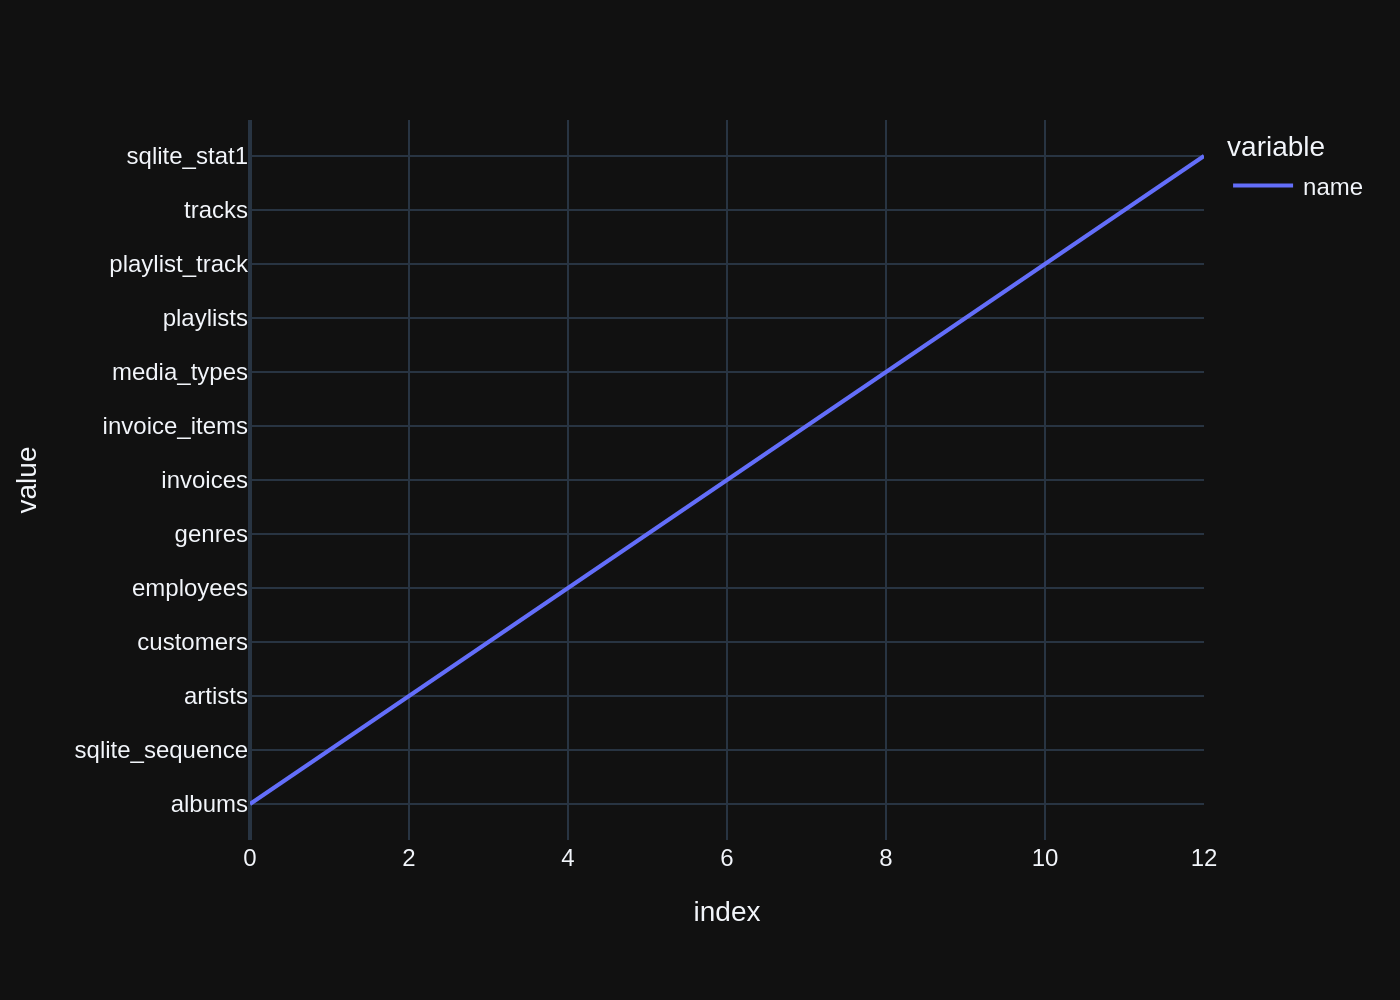

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 3:  which table stores customer's orders


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n 

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:28:43.750993627Z', 'message': {'role': 'assistant', 'content': 'invoices'}, 'done_reason': 'stop', 'done': True, 'total_duration': 110964951563, 'load_duration': 10426672, 'prompt_eval_count': 1041, 'prompt_eval_duration': 110403260000, 'eval_count': 2, 'eval_duration': 337457000}

[( LLM Response )]
invoices
*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode N

SELECT * FROM invoices


[( DATA )]
queried data frame


InvoiceId  CustomerId          InvoiceDate  \
0            1           2  2009-01-01 00:00:00   
1            2           4  2009-01-02 00:00:00   
2            3           8  2009-01-03 00:00:00   
3            4          14  2009-01-06 00:00:00   
4            5          23  2009-01-11 00:00:00   
..         ...         ...                  ...   
407        408          25  2013-12-05 00:00:00   
408        409          29  2013-12-06 00:00:00   
409        410          35  2013-12-09 00:00:00   
410        411          44  2013-12-14 00:00:00   
411        412          58  2013-12-22 00:00:00   

                               BillingAddress BillingCity BillingState  \
0                     Theodor-Heuss-Straße 34   Stuttgart         None   
1                            Ullevålsveien 14        Oslo         None   
2                             Grétrystraat 63    Brussels         None   
3                              8210 111 ST NW    Edmonton           AB   
4                             69 Salem Street      Boston           MA   
..                                        ...         ...          ...   
407                     319 N. Frances Street     Madison           WI   
408                    796 Dundas Street West     Toronto           ON   
409  Rua dos Campeões Europeus de Viena, 4350       Porto         None   
410                           Porthaninkatu 9    Helsinki         None   
411                       12,Community Centre       Delhi         None   

    BillingCountry BillingPostalCode  Total  
0          Germany             70174   1.98  
1           Norway              0171   3.96  
2          Belgium              1000   5.94  
3           Canada           T6G 2C7   8.91  
4              USA              2113  13.86  
..             ...               ...    ...  
407            USA             53703   3.96  
408         Canada           M6J 1V1   5.94  
409       Portugal              None   8.91  
410        Finland             00530  13.86  
411          India            110017   1.99  

[412 rows x 9 columns]


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question which table stores customer's orders, \n        the generated SQL statement invoices results in the following exception [ERROR-SQL] the generated SQL : invoices\n does not starts with ('select','with') .\n        Please fix the error and re-generate the SQL\n        '\n\nThe DataFrame was produced using this query: SELECT * FROM invoices\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"

import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['Total'].iloc[0]))
else:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['InvoiceDate'], y=df['Total'], mode='lines+markers'))

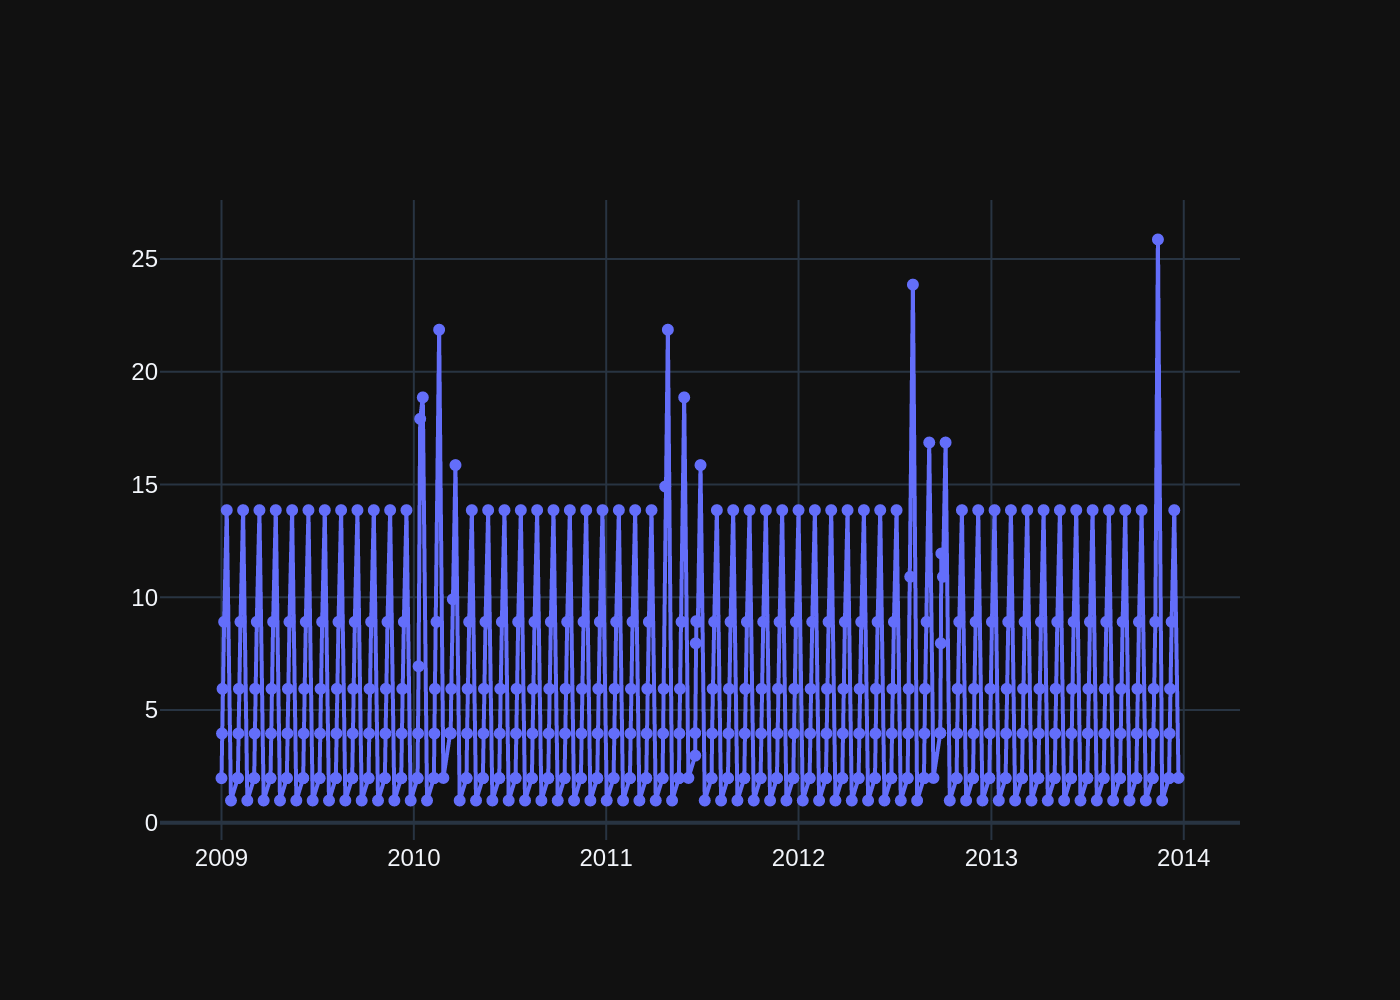

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 4:  How many customers are there


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName N

SELECT COUNT(*) FROM customers


[( DATA )]
queried data frame


COUNT(*)
0        59


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'How many customers are there'\n\nThe DataFrame was produced using this query: SELECT COUNT(*) FROM customers\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n COUNT(*)    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:33:01.191124008Z', 'message': {'role': 'assistant', 'content': 'import plotly.graph_objects as go\n\nfig = go.Figure(go.I

import plotly.graph_objects as go

fig = go.Figure(go.Indicator(mode="number", value=df['COUNT(*)'].iloc[0]))

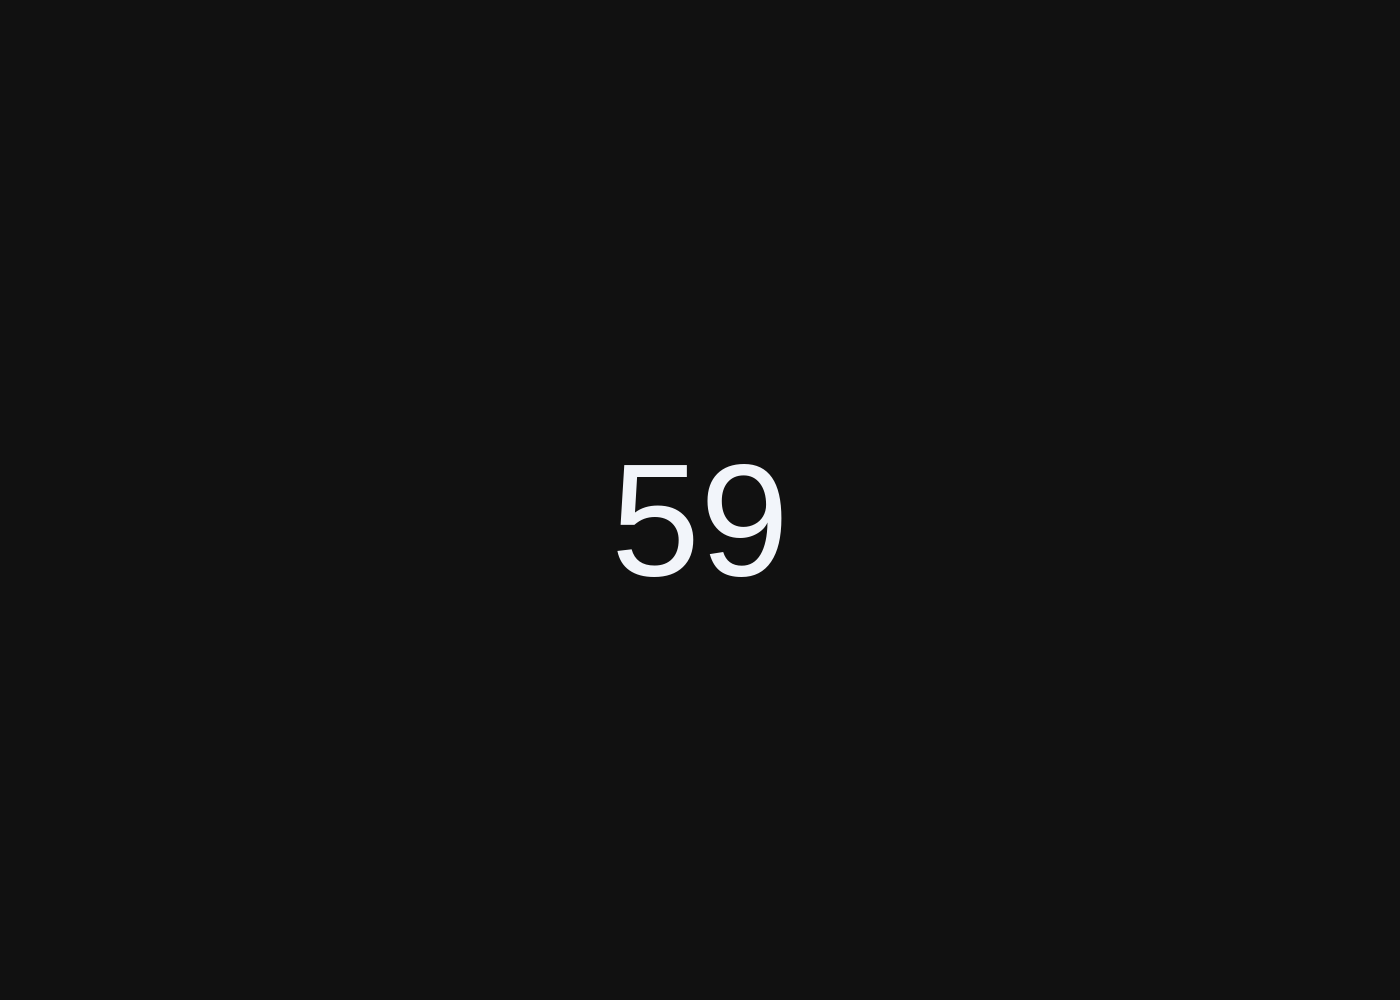

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 5:  what are the top 5 countries that customers come from?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCH

SELECT BillingCountry, COUNT(*) as CustomerCount 
FROM customers 
GROUP BY BillingCountry 
ORDER BY CustomerCount DESC 
LIMIT 5

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Addr

SELECT Country, COUNT(*) AS CustomerCount 
FROM customers 
GROUP BY Country 
ORDER BY CustomerCount DESC 
LIMIT 5


[( DATA )]
queried data frame


Country  CustomerCount
0      USA             13
1   Canada              8
2   France              5
3   Brazil              5
4  Germany              4


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question what are the top 5 countries that customers come from?, \n        the generated SQL statement SELECT BillingCountry, COUNT(*) as CustomerCount \nFROM customers \nGROUP BY BillingCountry \nORDER BY CustomerCount DESC \nLIMIT 5 results in the following exception [ERROR-DB] Failed to execute SQL: SELECT BillingCountry, COUNT(*) as CustomerCount \nFROM customers \nGROUP BY BillingCountry \nORDER BY CustomerCount DESC \nLIMIT 5\n Execution failed on sql 'SELECT BillingCountry, COUNT(*) as CustomerCount \nFROM customers \nGROUP BY BillingCountry \nORDER BY CustomerCount DESC \nLIMIT 5': no such column: BillingCountry .\n        Please fix the error and re-generate the SQL\n        '\n\nThe DataFrame was produced using this query:

import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['CustomerCount'].iloc[0]))
else:
    fig = go.Figure([go.Bar(x=df['Country'], y=df['CustomerCount'])])

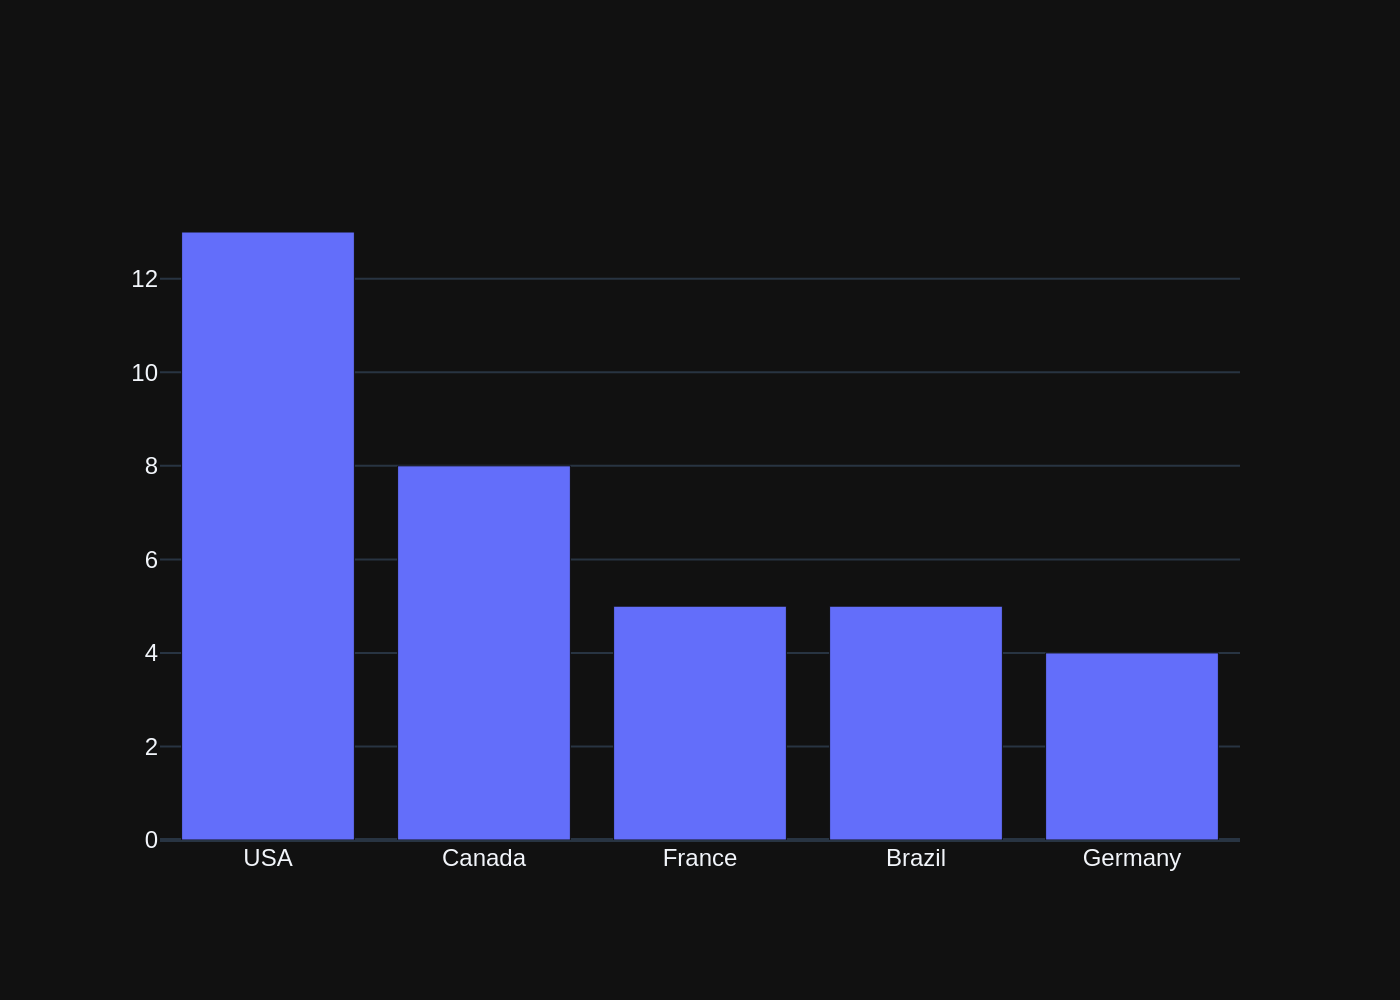

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 6:  List all albums and their corresponding artist names  


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(1

SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName 
FROM albums a 
JOIN artists ar ON a.ArtistId = ar.ArtistId


[( DATA )]
queried data frame


AlbumTitle  \
0                For Those About To Rock We Salute You   
1                                    Balls to the Wall   
2                                    Restless and Wild   
3                                    Let There Be Rock   
4                                             Big Ones   
..                                                 ...   
342                             Respighi:Pines of Rome   
343  Schubert: The Late String Quartets & String Qu...   
344                                Monteverdi: L'Orfeo   
345                              Mozart: Chamber Music   
346  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                            ArtistName  
0                                                AC/DC  
1                                               Accept  
2                                               Accept  
3                                                AC/DC  
4                                            Aerosmith  
..                                                 ...  
342                                     Eugene Ormandy  
343                             Emerson String Quartet  
344  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
345                                      Nash Ensemble  
346                              Philip Glass Ensemble  

[347 rows x 2 columns]


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all albums and their corresponding artist names  '\n\nThe DataFrame was produced using this query: SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName \nFROM albums a \nJOIN artists ar ON a.ArtistId = ar.ArtistId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n AlbumTitle    object\nArtistName    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2

import plotly.graph_objs as go
import plotly.offline as py

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="text", value=df['AlbumTitle'][0], title={"text": df['ArtistName'][0]}))
else:
    fig = go.Figure(data=[go.Bar(x=df['AlbumTitle'], y=df.index, text=df['ArtistName'], textposition='auto', name='Albums by Artist')])
fig.update_layout(title="Albums and Their Artists")
py.plot(fig)

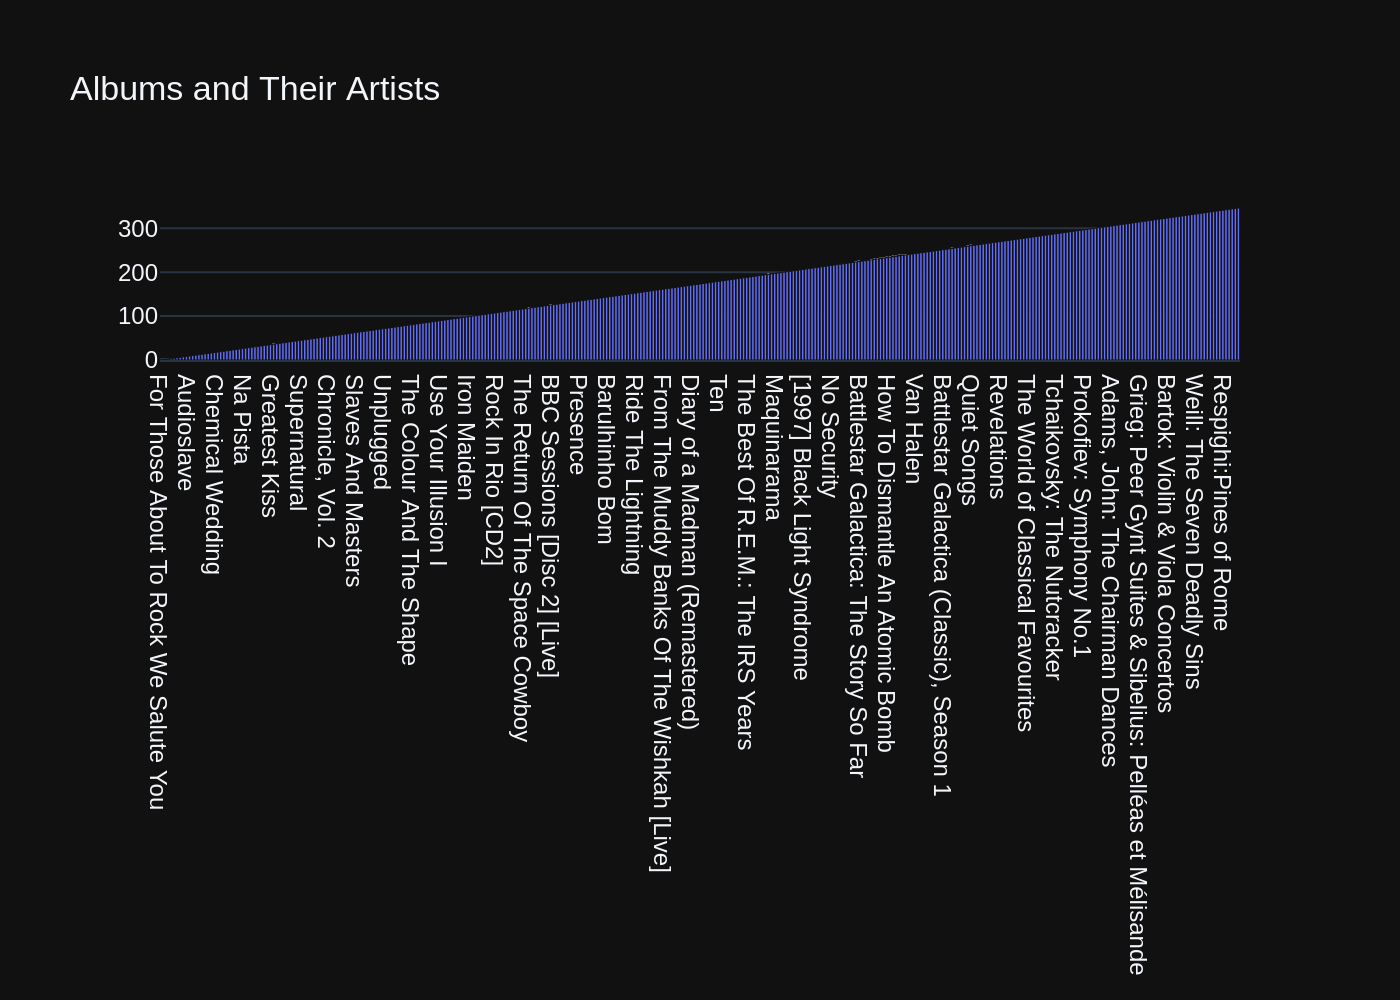

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 7:  Find all tracks with a name containing "What" (case-insensitive) 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DEL

SELECT TrackId, Name FROM tracks WHERE LOWER(Name) LIKE '%what%'


[( DATA )]
queried data frame


TrackId                                          Name
0        26                                 What It Takes
1        88                                  What You Are
2       130                             Do what cha wanna
3       342                   What is and Should Never Be
4       607                                       So What
5       960                                    What A Day
6      1000                                 What If I Do?
7      1039                              What Now My Love
8      1145                                   Whatsername
9      1440             Whatever It Is, I Just Can't Stop
10     1469                         Look What You've Done
11     1470                             Get What You Need
12     1628              What Is And What Should Never Be
13     1778  You're What's Happening (In The World Today)
14     1823                                       So What
15     2772           I Don't Know What To Do With Myself
16     2884                                 What Kate Did
17     2893                      Whatever the Case May Be
18     2992    I Still Haven't Found What I'm Looking for
19     3007    I Still Haven't Found What I'm Looking For
20     3258              Whatever Gets You Thru the Night
21     3475                          What Is It About Men


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all tracks with a name containing \"What\" (case-insensitive) '\n\nThe DataFrame was produced using this query: SELECT TrackId, Name FROM tracks WHERE LOWER(Name) LIKE '%what%'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n TrackId     int64\nName       object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:43:42.109977455Z', 'message':

import plotly.graph_objs as go
if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="text", value=df['Name'][0]))
else:
    fig = go.Figure(data=[go.Bar(x=df['TrackId'], y=df['Name'].str.len(), text=df['Name'], textposition='auto')])

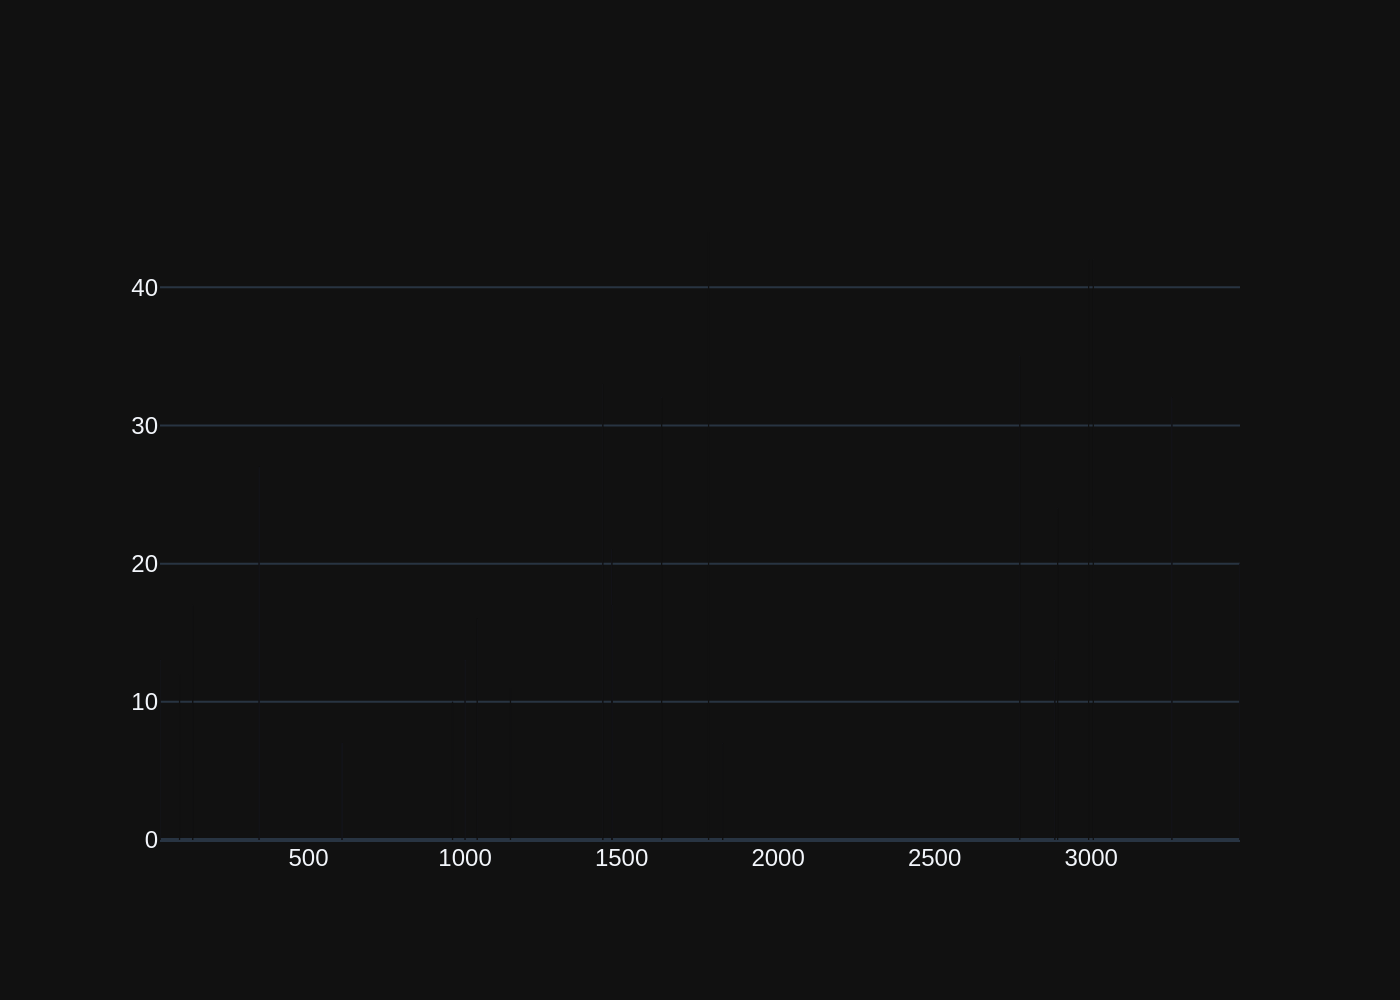

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 8:  Get the total number of invoices for each customer


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName


[( DATA )]
queried data frame


CustomerId  FirstName      LastName  TotalInvoices
0            1       Luís     Gonçalves              7
1            2     Leonie        Köhler              7
2            3   François      Tremblay              7
3            4      Bjørn        Hansen              7
4            5  František   Wichterlová              7
5            6     Helena          Holý              7
6            7     Astrid        Gruber              7
7            8       Daan       Peeters              7
8            9       Kara       Nielsen              7
9           10    Eduardo       Martins              7
10          11  Alexandre         Rocha              7
11          12    Roberto       Almeida              7
12          13   Fernanda         Ramos              7
13          14       Mark       Philips              7
14          15   Jennifer      Peterson              7
15          16      Frank        Harris              7
16          17       Jack         Smith              7
17          18   Michelle        Brooks              7
18          19        Tim         Goyer              7
19          20        Dan        Miller              7
20          21      Kathy         Chase              7
21          22    Heather       Leacock              7
22          23       John        Gordon              7
23          24      Frank       Ralston              7
24          25     Victor       Stevens              7
25          26    Richard    Cunningham              7
26          27    Patrick          Gray              7
27          28      Julia       Barnett              7
28          29     Robert         Brown              7
29          30     Edward       Francis              7
30          31     Martha          Silk              7
31          32      Aaron      Mitchell              7
32          33      Ellie      Sullivan              7
33          34       João     Fernandes              7
34          35   Madalena       Sampaio              7
35          36     Hannah     Schneider              7
36          37       Fynn    Zimmermann              7
37          38     Niklas      Schröder              7
38          39    Camille       Bernard              7
39          40  Dominique      Lefebvre              7
40          41       Marc        Dubois              7
41          42      Wyatt        Girard              7
42          43   Isabelle       Mercier              7
43          44      Terhi    Hämäläinen              7
44          45   Ladislav        Kovács              7
45          46       Hugh      O'Reilly              7
46          47      Lucas       Mancini              7
47          48   Johannes  Van der Berg              7
48          49  Stanisław        Wójcik              7
49          50    Enrique         Muñoz              7
50          51     Joakim     Johansson              7
51          52       Emma         Jones              7
52          53       Phil        Hughes              7
53          54      Steve        Murray              7
54          55       Mark        Taylor              7
55          56      Diego     Gutiérrez              7
56          57       Luis         Rojas              7
57          58      Manoj        Pareek              7
58          59       Puja    Srivastava              6


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get the total number of invoices for each customer'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId        int64\nFirstName        object\nLastName         object\nTotalInvoices     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only 

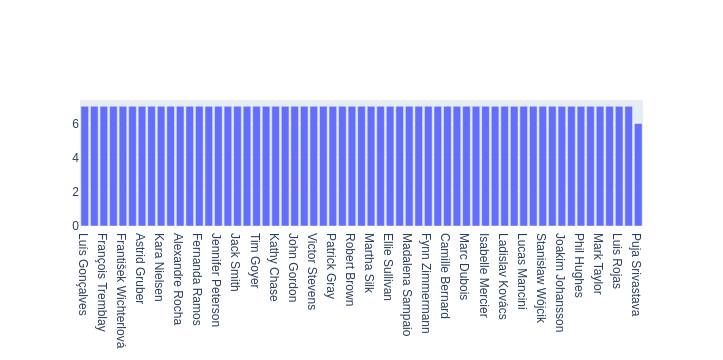


[( PYTHON )]
generated Plotly code


import plotly.graph_objs as go
import plotly.io as pio

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalInvoices'].values[0]))
else:
    fig = go.Figure(data=[go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['TotalInvoices'])])

pio.show(fig)

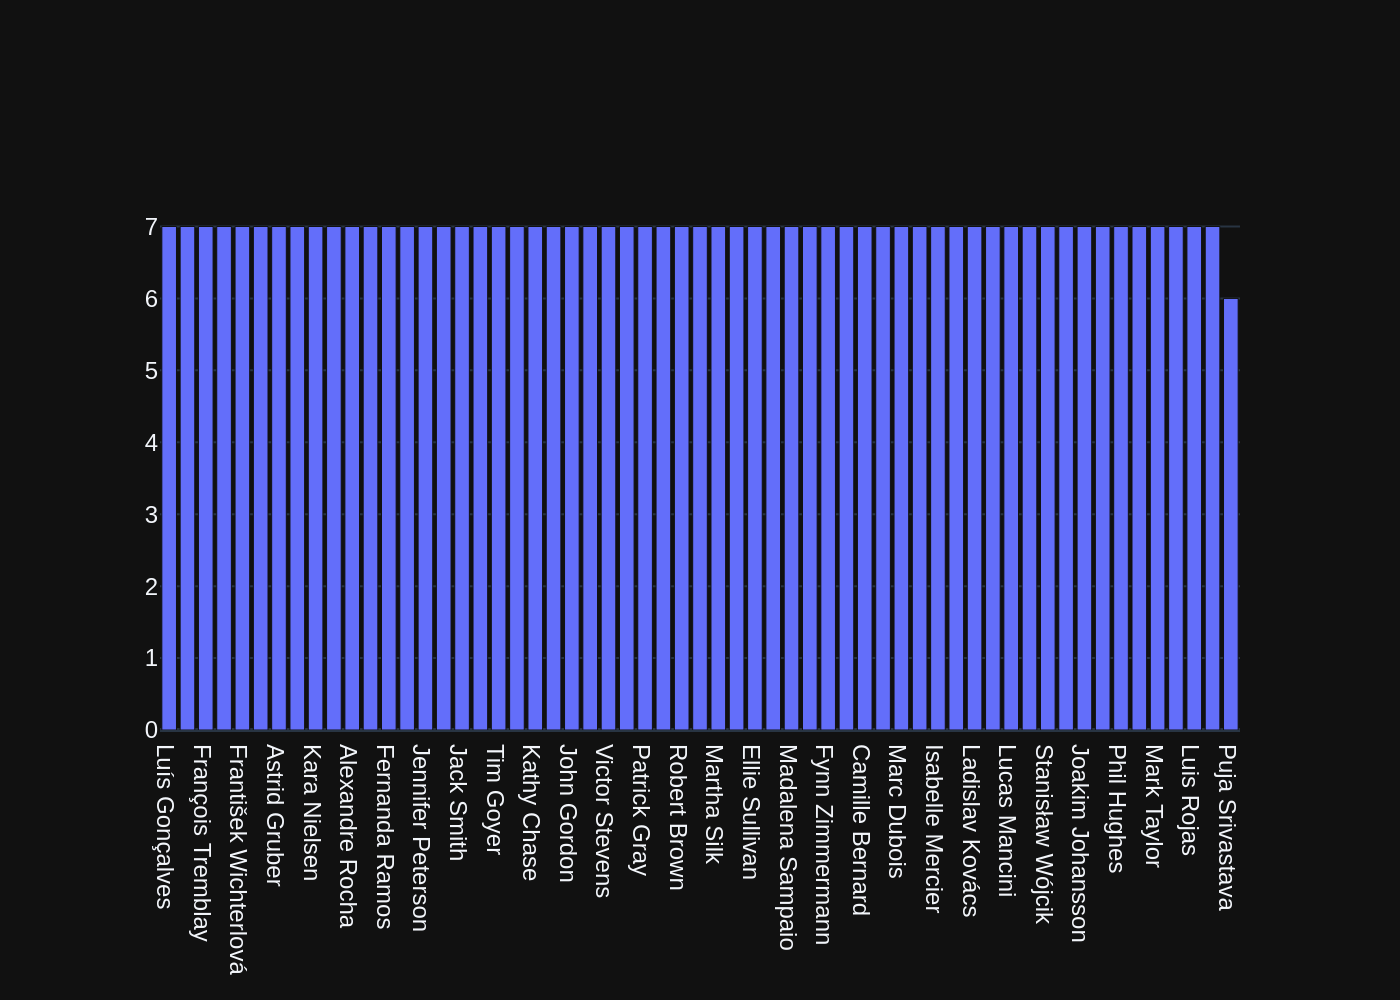

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7



# QUESTION - 9:  Find the total number of invoices per country



Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT N

SELECT c.Country, COUNT(i.InvoiceId) AS TotalInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.Country


[( DATA )]
queried data frame


Country  TotalInvoices
0        Argentina              7
1        Australia              7
2          Austria              7
3          Belgium              7
4           Brazil             35
5           Canada             56
6            Chile              7
7   Czech Republic             14
8          Denmark              7
9          Finland              7
10          France             35
11         Germany             28
12         Hungary              7
13           India             13
14         Ireland              7
15           Italy              7
16     Netherlands              7
17          Norway              7
18          Poland              7
19        Portugal             14
20           Spain              7
21          Sweden              7
22             USA             91
23  United Kingdom             21


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the total number of invoices per country'\n\nThe DataFrame was produced using this query: SELECT c.Country, COUNT(i.InvoiceId) AS TotalInvoices\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.Country\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Country          object\nTotalInvoices     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalInvoices'].iloc[0]))
else:
    fig = go.Figure([go.Bar(x=df['Country'], y=df['TotalInvoices'])])

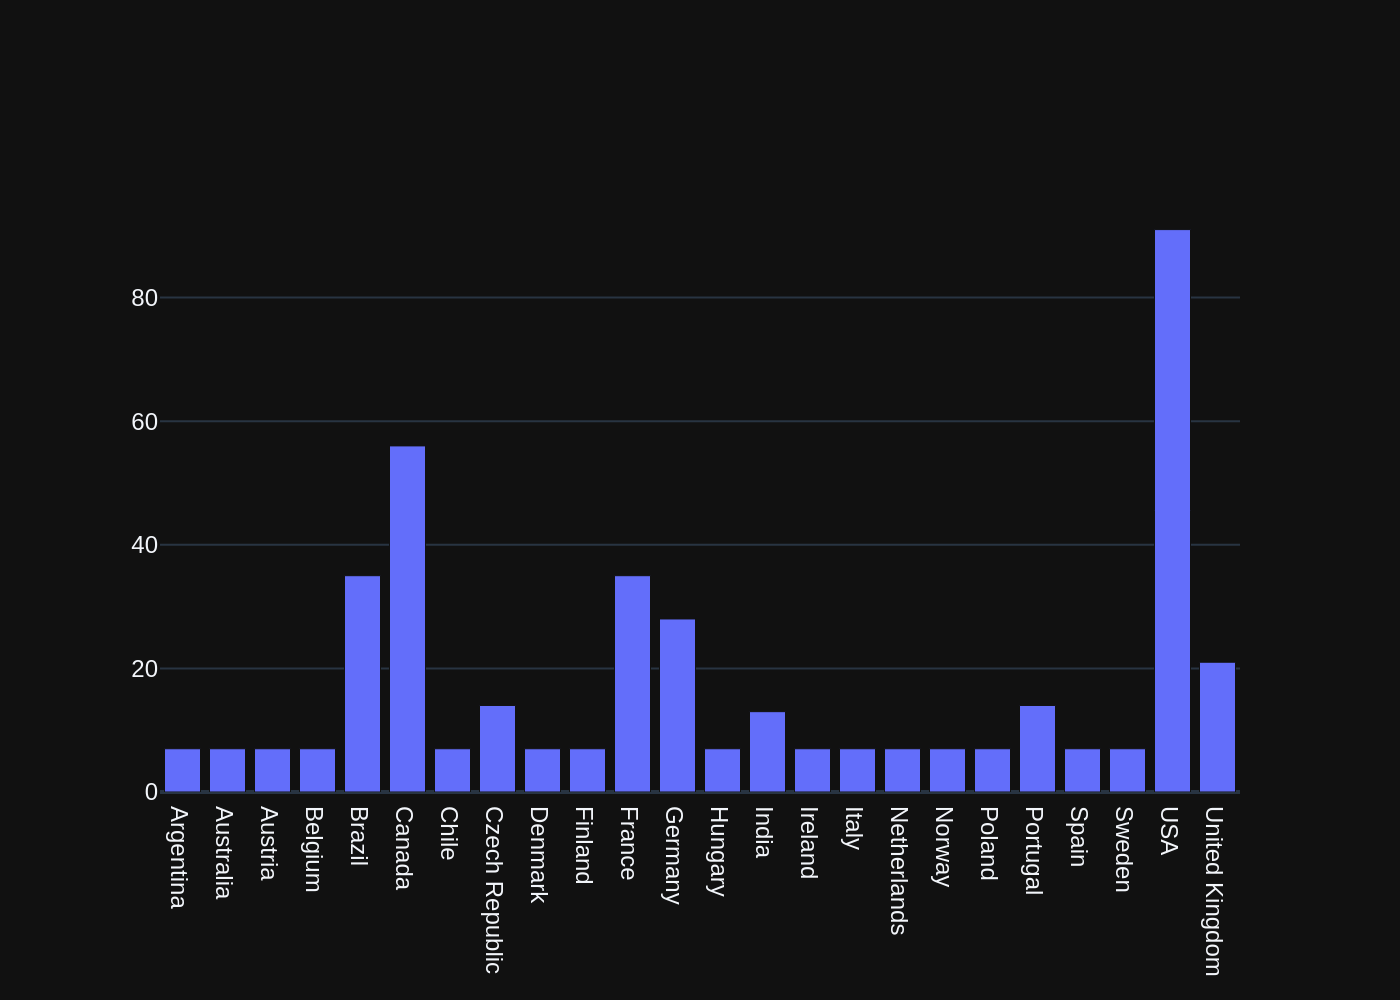

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 10:  List all invoices with a total exceeding $10


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NU

SELECT InvoiceId, Total FROM invoices WHERE Total > 10


[( DATA )]
queried data frame


InvoiceId  Total
0           5  13.86
1          12  13.86
2          19  13.86
3          26  13.86
4          33  13.86
..        ...    ...
59        383  13.86
60        390  13.86
61        397  13.86
62        404  25.86
63        411  13.86

[64 rows x 2 columns]


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all invoices with a total exceeding $10'\n\nThe DataFrame was produced using this query: SELECT InvoiceId, Total FROM invoices WHERE Total > 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId      int64\nTotal        float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:54:54.021672117Z', 'message': {'role': 'assistant', 'con

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="value", value=df['Total'].iloc[0]))
else:
    fig = go.Figure([go.Bar(x=df['InvoiceId'], y=df['Total'], name='Invoice Totals')])

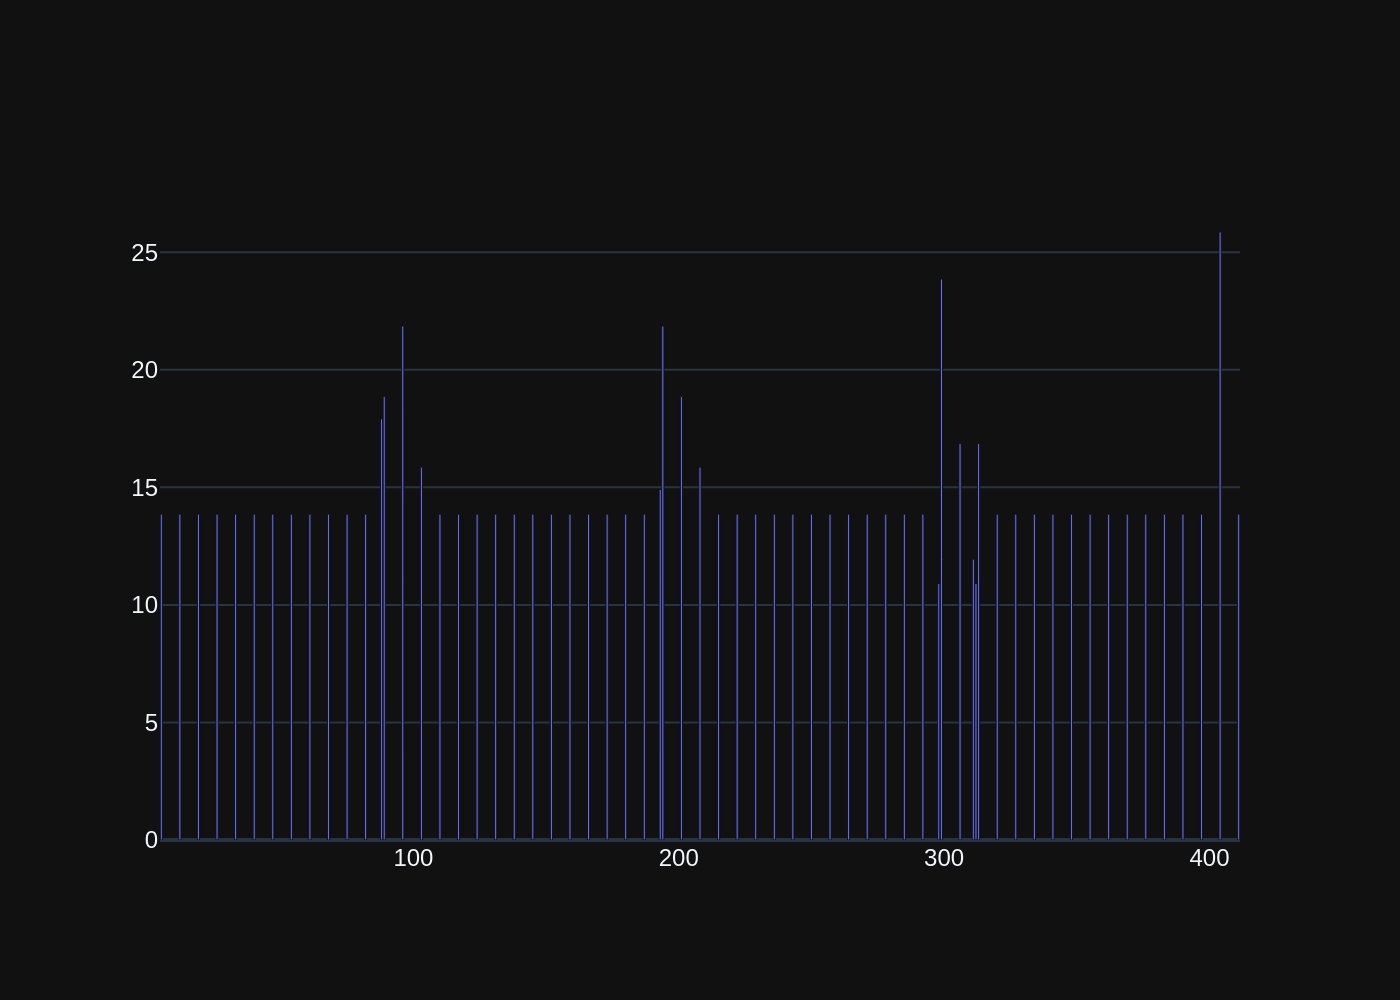

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 11:  Find all invoices since 2010 and the total amount invoiced:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId

SELECT InvoiceId, Total 
FROM invoices 
WHERE InvoiceDate >= '2010-01-01'


[( DATA )]
queried data frame


InvoiceId  Total
0           84   1.98
1           85   1.98
2           86   3.96
3           87   6.94
4           88  17.91
..         ...    ...
324        408   3.96
325        409   5.94
326        410   8.91
327        411  13.86
328        412   1.99

[329 rows x 2 columns]


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all invoices since 2010 and the total amount invoiced:'\n\nThe DataFrame was produced using this query: SELECT InvoiceId, Total \nFROM invoices \nWHERE InvoiceDate >= '2010-01-01'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId      int64\nTotal        float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-10-12T23:59:03.300786165Z', '

import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['Total'].iloc[0]))
else:
    fig = go.Figure([go.Scatter(x=df['InvoiceId'], y=df['Total'], mode='markers+lines')])

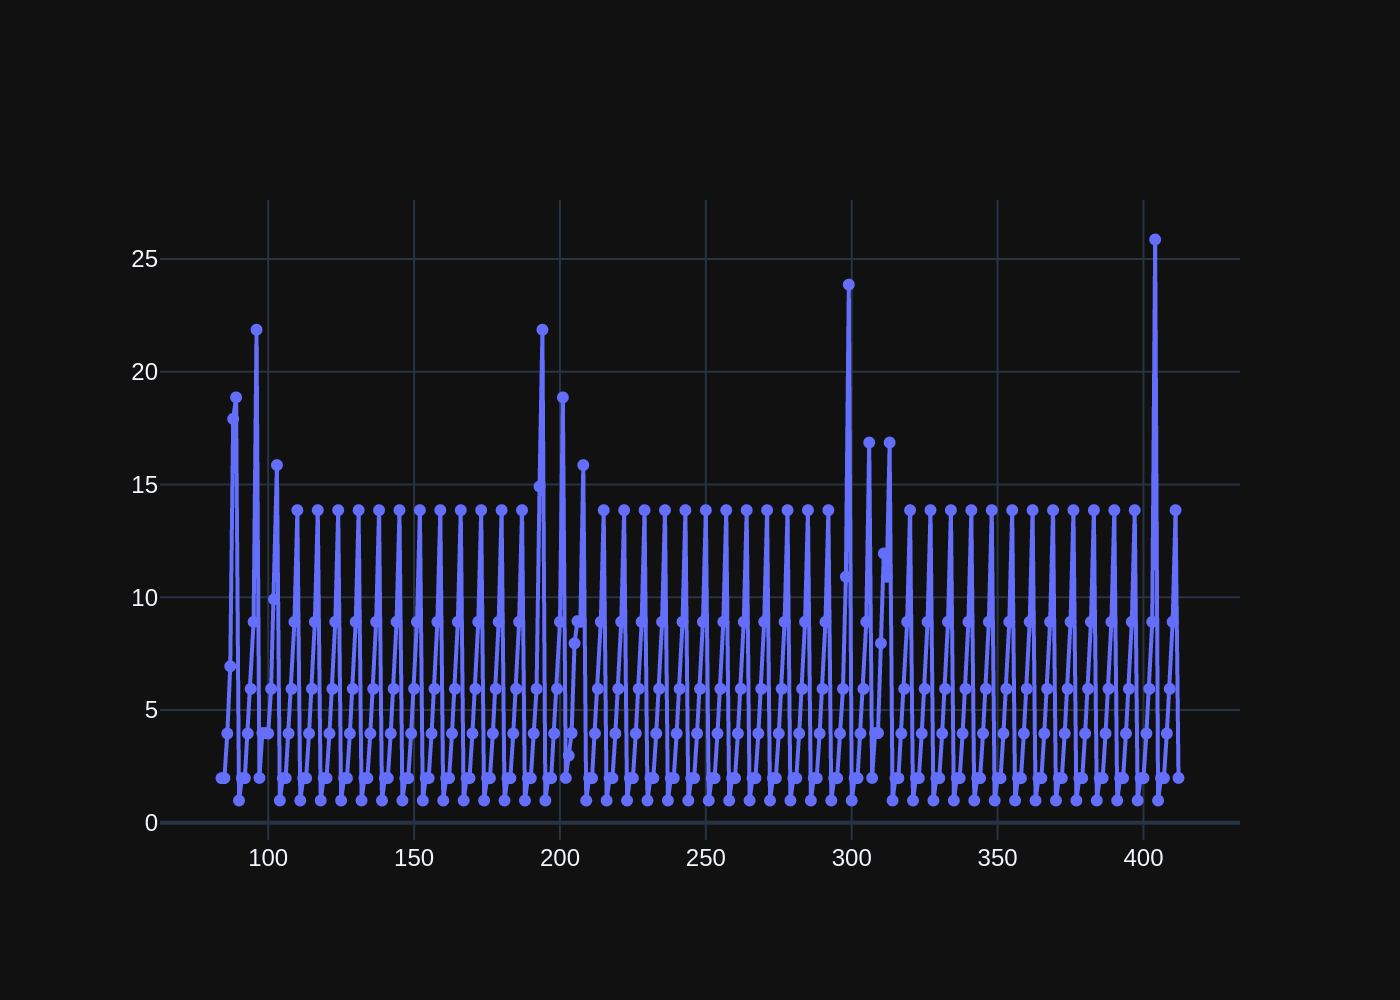

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 12:  List all employees and their reporting manager's name (if any):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE 

SELECT e1.EmployeeId, e1.FirstName || ' ' || e1.LastName AS EmployeeName, 
       COALESCE(e2.FirstName || ' ' || e2.LastName, 'None') AS ManagerName 
FROM employees e1 
LEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId


[( DATA )]
queried data frame


EmployeeId      EmployeeName       ManagerName
0           1      Andrew Adams              None
1           2     Nancy Edwards      Andrew Adams
2           3      Jane Peacock     Nancy Edwards
3           4     Margaret Park     Nancy Edwards
4           5     Steve Johnson     Nancy Edwards
5           6  Michael Mitchell      Andrew Adams
6           7       Robert King  Michael Mitchell
7           8    Laura Callahan  Michael Mitchell


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all employees and their reporting manager's name (if any):'\n\nThe DataFrame was produced using this query: SELECT e1.EmployeeId, e1.FirstName || ' ' || e1.LastName AS EmployeeName, \n       COALESCE(e2.FirstName || ' ' || e2.LastName, 'None') AS ManagerName \nFROM employees e1 \nLEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n EmployeeId       int64\nEmployeeName    object\nManagerName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. R

import plotly.graph_objs as go
import plotly.figure_factory as ff

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="text", value=df['EmployeeName'].iloc[0], text=df['ManagerName'].iloc[0]))
else:
    fig = ff.create_table(df)

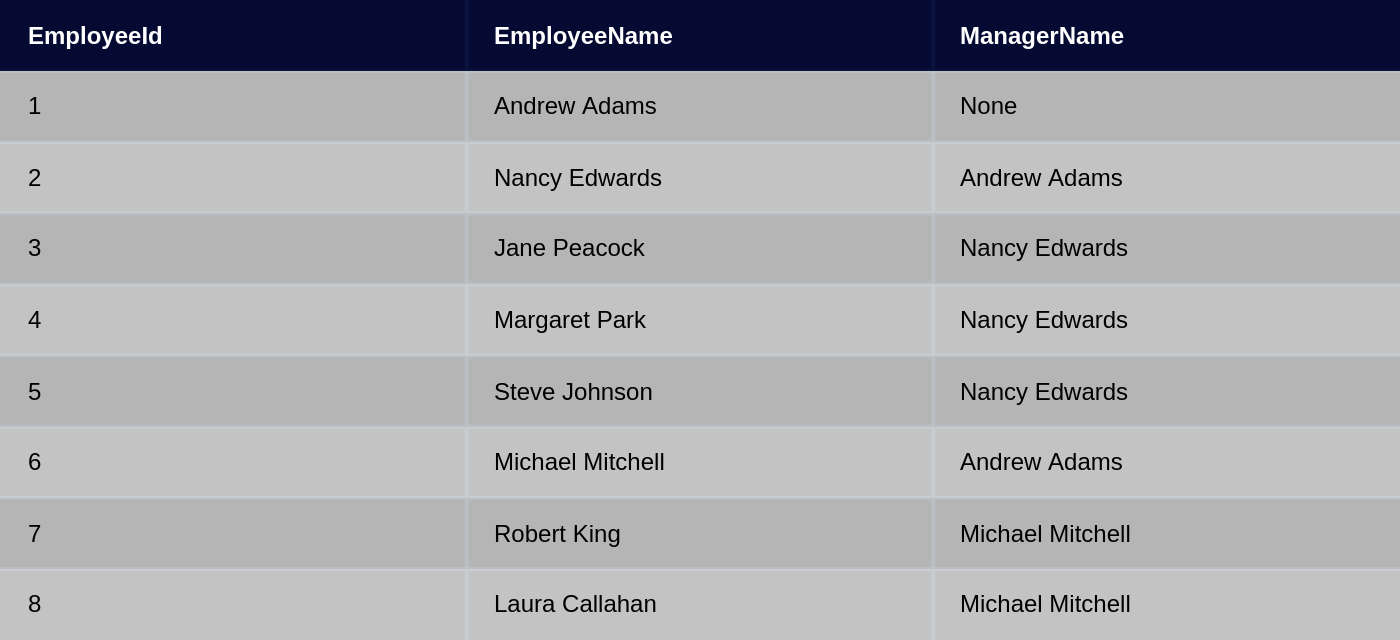

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 13:   Get the average invoice total for each customer:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName


[( DATA )]
queried data frame


CustomerId  FirstName      LastName  AverageInvoiceTotal
0            1       Luís     Gonçalves             5.660000
1            2     Leonie        Köhler             5.374286
2            3   François      Tremblay             5.660000
3            4      Bjørn        Hansen             5.660000
4            5  František   Wichterlová             5.802857
5            6     Helena          Holý             7.088571
6            7     Astrid        Gruber             6.088571
7            8       Daan       Peeters             5.374286
8            9       Kara       Nielsen             5.374286
9           10    Eduardo       Martins             5.374286
10          11  Alexandre         Rocha             5.374286
11          12    Roberto       Almeida             5.374286
12          13   Fernanda         Ramos             5.374286
13          14       Mark       Philips             5.374286
14          15   Jennifer      Peterson             5.517143
15          16      Frank        Harris             5.374286
16          17       Jack         Smith             5.660000
17          18   Michelle        Brooks             5.374286
18          19        Tim         Goyer             5.517143
19          20        Dan        Miller             5.660000
20          21      Kathy         Chase             5.374286
21          22    Heather       Leacock             5.660000
22          23       John        Gordon             5.374286
23          24      Frank       Ralston             6.231429
24          25     Victor       Stevens             6.088571
25          26    Richard    Cunningham             6.802857
26          27    Patrick          Gray             5.374286
27          28      Julia       Barnett             6.231429
28          29     Robert         Brown             5.374286
29          30     Edward       Francis             5.374286
30          31     Martha          Silk             5.374286
31          32      Aaron      Mitchell             5.374286
32          33      Ellie      Sullivan             5.374286
33          34       João     Fernandes             5.660000
34          35   Madalena       Sampaio             5.374286
35          36     Hannah     Schneider             5.374286
36          37       Fynn    Zimmermann             6.231429
37          38     Niklas      Schröder             5.374286
38          39    Camille       Bernard             5.517143
39          40  Dominique      Lefebvre             5.517143
40          41       Marc        Dubois             5.374286
41          42      Wyatt        Girard             5.660000
42          43   Isabelle       Mercier             5.802857
43          44      Terhi    Hämäläinen             5.945714
44          45   Ladislav        Kovács             6.517143
45          46       Hugh      O'Reilly             6.517143
46          47      Lucas       Mancini             5.374286
47          48   Johannes  Van der Berg             5.802857
48          49  Stanisław        Wójcik             5.374286
49          50    Enrique         Muñoz             5.374286
50          51     Joakim     Johansson             5.517143
51          52       Emma         Jones             5.374286
52          53       Phil        Hughes             5.374286
53          54      Steve        Murray             5.374286
54          55       Mark        Taylor             5.374286
55          56      Diego     Gutiérrez             5.374286
56          57       Luis         Rojas             6.660000
57          58      Manoj        Pareek             5.517143
58          59       Puja    Srivastava             6.106667


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' Get the average invoice total for each customer:'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, AVG(i.Total) AS AverageInvoiceTotal\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId               int64\nFirstName               object\nLastName                object\nAverageInvoiceTotal    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an In

import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['AverageInvoiceTotal'].iloc[0]))
else:
    fig = go.Figure([go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['AverageInvoiceTotal'])])

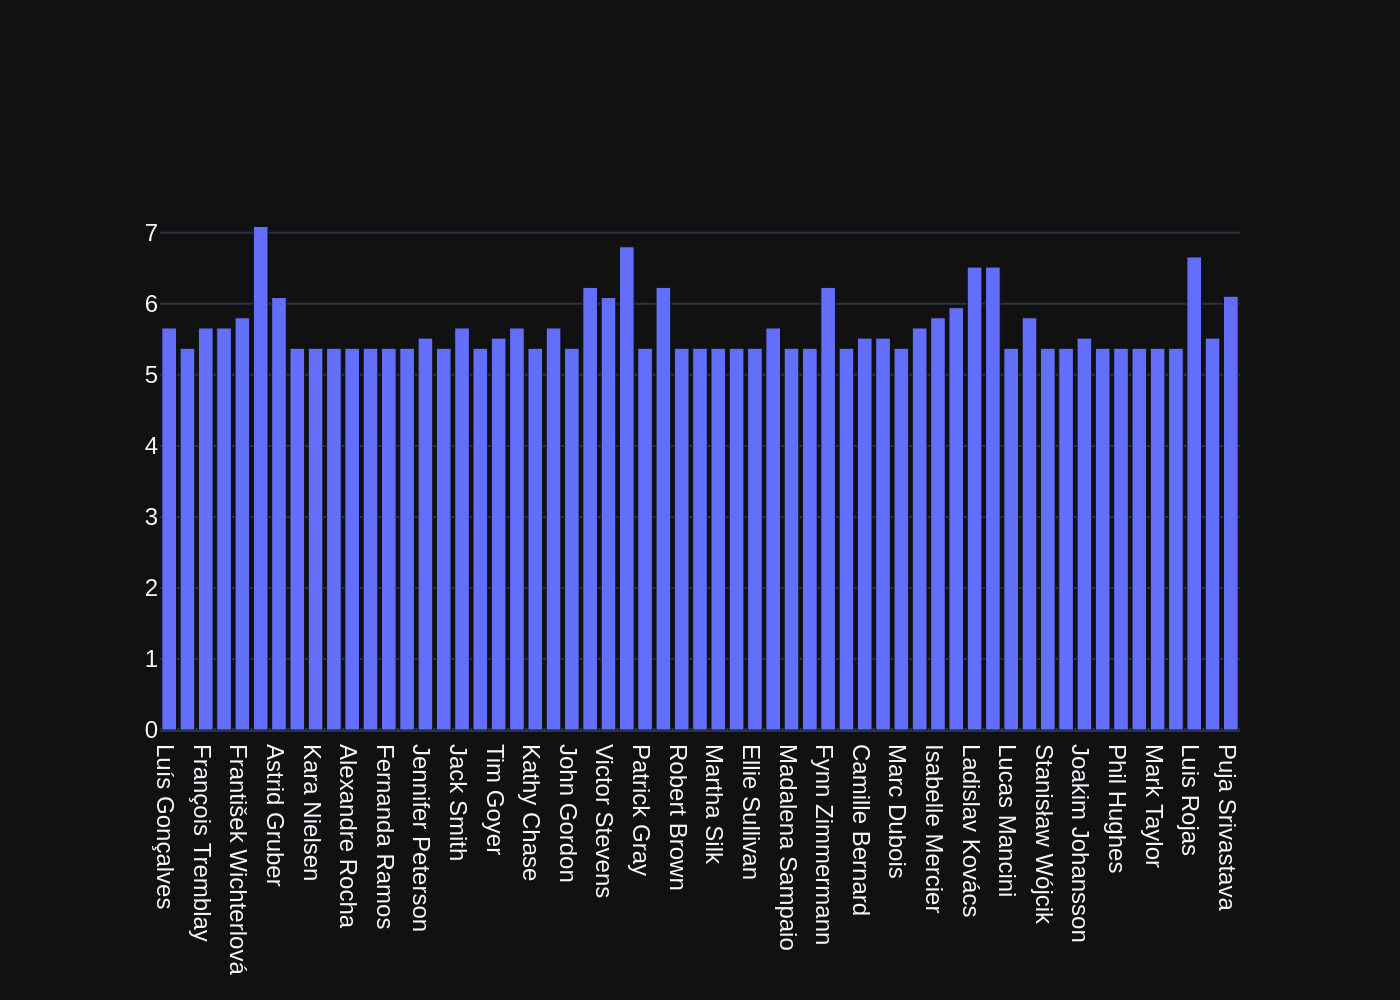

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 14:  Find the top 5 most expensive tracks (based on unit price):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACT

SELECT TrackId, Name, UnitPrice 
FROM tracks 
ORDER BY UnitPrice DESC 
LIMIT 5


[( DATA )]
queried data frame


TrackId                                    Name  UnitPrice
0     2819  Battlestar Galactica: The Story So Far       1.99
1     2820                  Occupation / Precipice       1.99
2     2821                           Exodus, Pt. 1       1.99
3     2822                           Exodus, Pt. 2       1.99
4     2823                           Collaborators       1.99


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the top 5 most expensive tracks (based on unit price):'\n\nThe DataFrame was produced using this query: SELECT TrackId, Name, UnitPrice \nFROM tracks \nORDER BY UnitPrice DESC \nLIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n TrackId        int64\nName          object\nUnitPrice    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5:14b', 'created_at': '2024-1

import plotly.graph_objs as go
if len(df) == 1:
    fig = go.Figure(go.Indicator(mode='number', value=df['UnitPrice'].values[0]))
else:
    fig = go.Figure([go.Bar(x=df['Name'], y=df['UnitPrice'])])

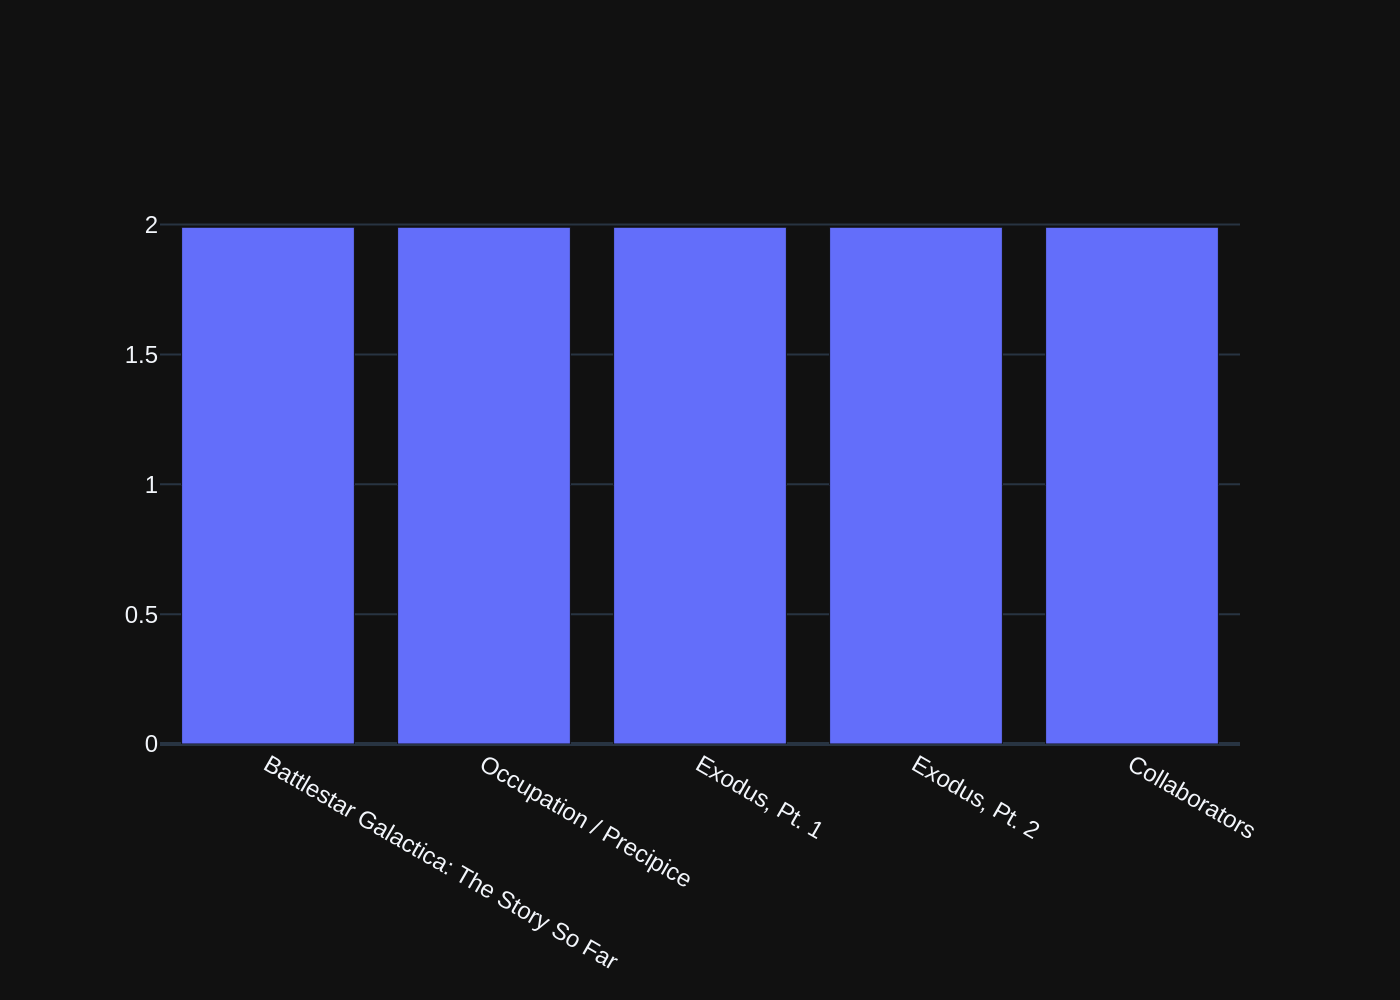

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 15:  List all genres and the number of tracks in each genre:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION 

SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.Name


[( DATA )]
queried data frame


GenreName  NumberOfTracks
0          Alternative              40
1   Alternative & Punk             332
2                Blues              81
3           Bossa Nova              15
4            Classical              74
5               Comedy              17
6                Drama              64
7       Easy Listening              24
8    Electronica/Dance              30
9          Heavy Metal              28
10         Hip Hop/Rap              35
11                Jazz             130
12               Latin             579
13               Metal             374
14               Opera               1
15                 Pop              48
16            R&B/Soul              61
17              Reggae              58
18                Rock            1297
19       Rock And Roll              12
20    Sci Fi & Fantasy              26
21     Science Fiction              13
22          Soundtrack              43
23            TV Shows              93
24               World              28


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all genres and the number of tracks in each genre:'\n\nThe DataFrame was produced using this query: SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks\nFROM genres g\nJOIN tracks t ON g.GenreId = t.GenreId\nGROUP BY g.Name\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n GenreName         object\nNumberOfTracks     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': '

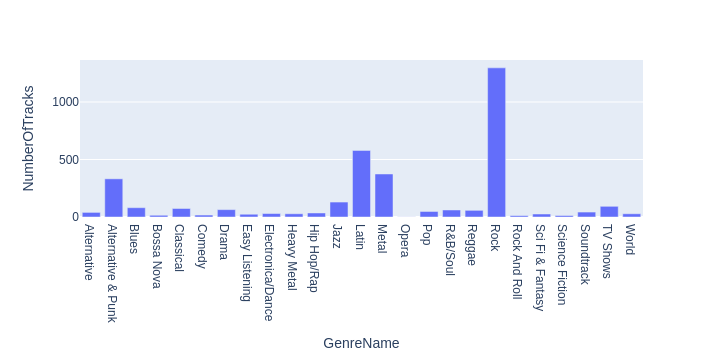


[( PYTHON )]
generated Plotly code


import plotly.graph_objs as go
import plotly.io as pio

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['NumberOfTracks'].values[0]))
else:
    fig = px.bar(df, x='GenreName', y='NumberOfTracks')

pio.show(fig)

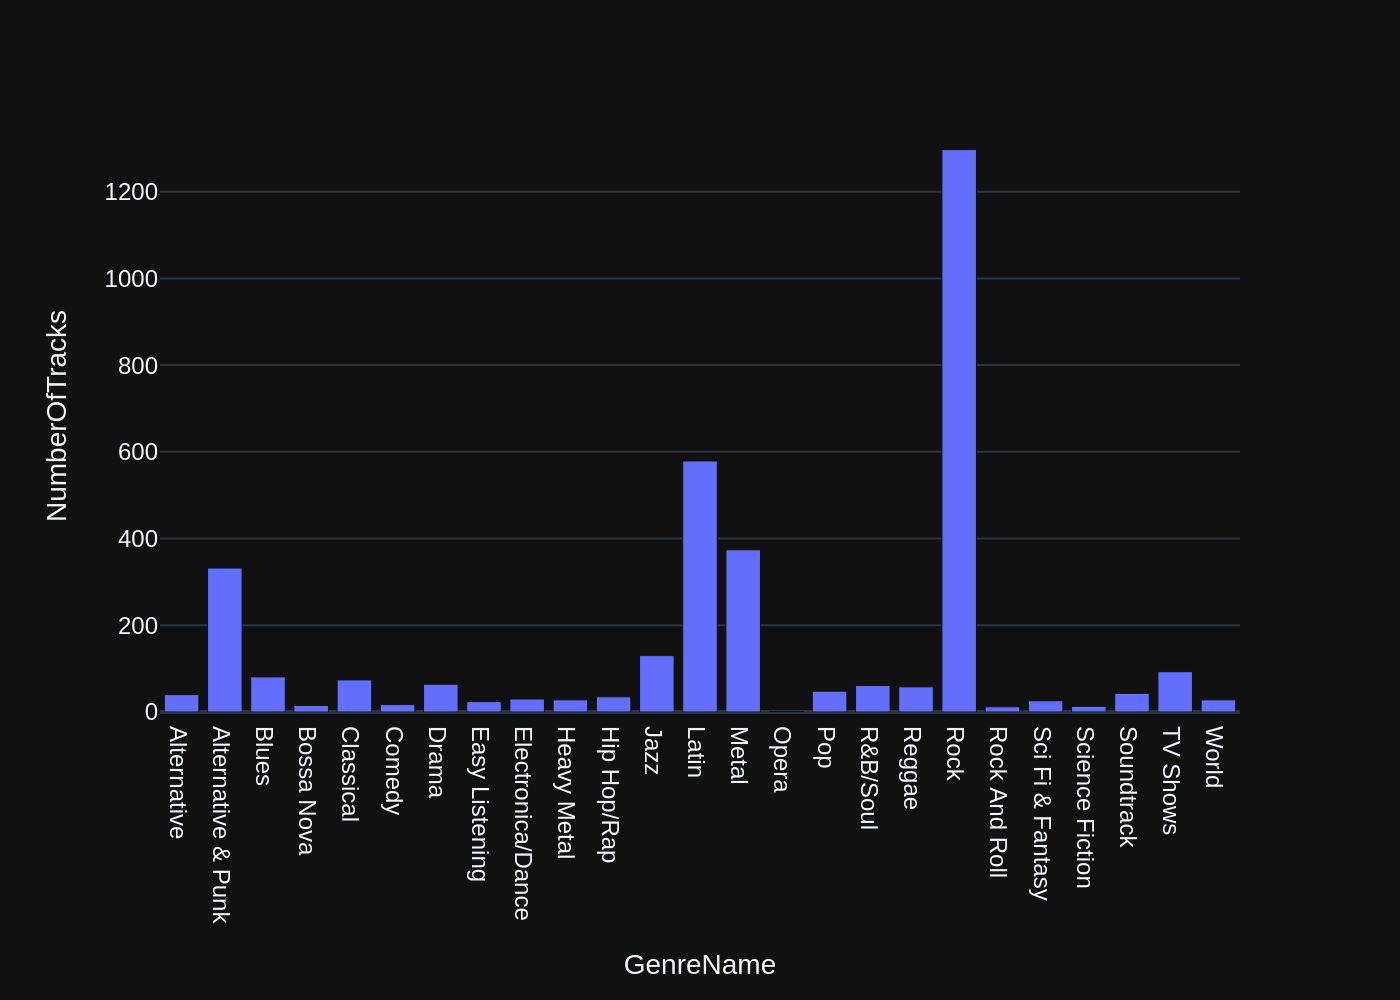

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 16:  Get all genres that do not have any tracks associated with them:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REF

SELECT Name 
FROM genres 
WHERE GenreId NOT IN (SELECT GenreId FROM tracks)


[( DATA )]
queried data frame


Empty DataFrame
Columns: [Name]
Index: []

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 17:  List all customers who have not placed any orders:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(

SELECT CustomerId, FirstName, LastName 
FROM customers 
WHERE CustomerId NOT IN (SELECT CustomerId FROM invoices)


[( DATA )]
queried data frame


Empty DataFrame
Columns: [CustomerId, FirstName, LastName]
Index: []

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FORE

SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId, a.Name
ORDER BY NumberOfTracks DESC
LIMIT 10


[( DATA )]
queried data frame


ArtistName  NumberOfTracks
0      Iron Maiden             213
1               U2             135
2     Led Zeppelin             114
3        Metallica             112
4      Deep Purple              92
5             Lost              92
6        Pearl Jam              67
7    Lenny Kravitz              57
8  Various Artists              56
9       The Office              53


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' \n        Can you find the top 10 most popular artists based on the number of tracks?\n        Hint: There are 3 tables - artists, albums and tracks, \n        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,\n    '\n\nThe DataFrame was produced using this query: SELECT a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks\nFROM artists a\nJOIN albums al ON a.ArtistId = al.ArtistId\nJOIN tracks t ON al.AlbumId = t.AlbumId\nGROUP BY a.ArtistId, a.Name\nORDER BY NumberOfTracks DESC\nLIMIT 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n ArtistName        object\nNumberOfTracks     int64\ndtype: object"}, {"role": "user", "content": "Can you generate t

if len(df) == 1:
    import plotly.graph_objects as go
    fig = go.Figure(go.Indicator(mode="number", value=df['NumberOfTracks'].iloc[0], title={"text": df['ArtistName'].iloc[0]}))
else:
    import plotly.express as px
    fig = px.bar(df, x='ArtistName', y='NumberOfTracks', title='Top 10 Most Popular Artists by Number of Tracks')

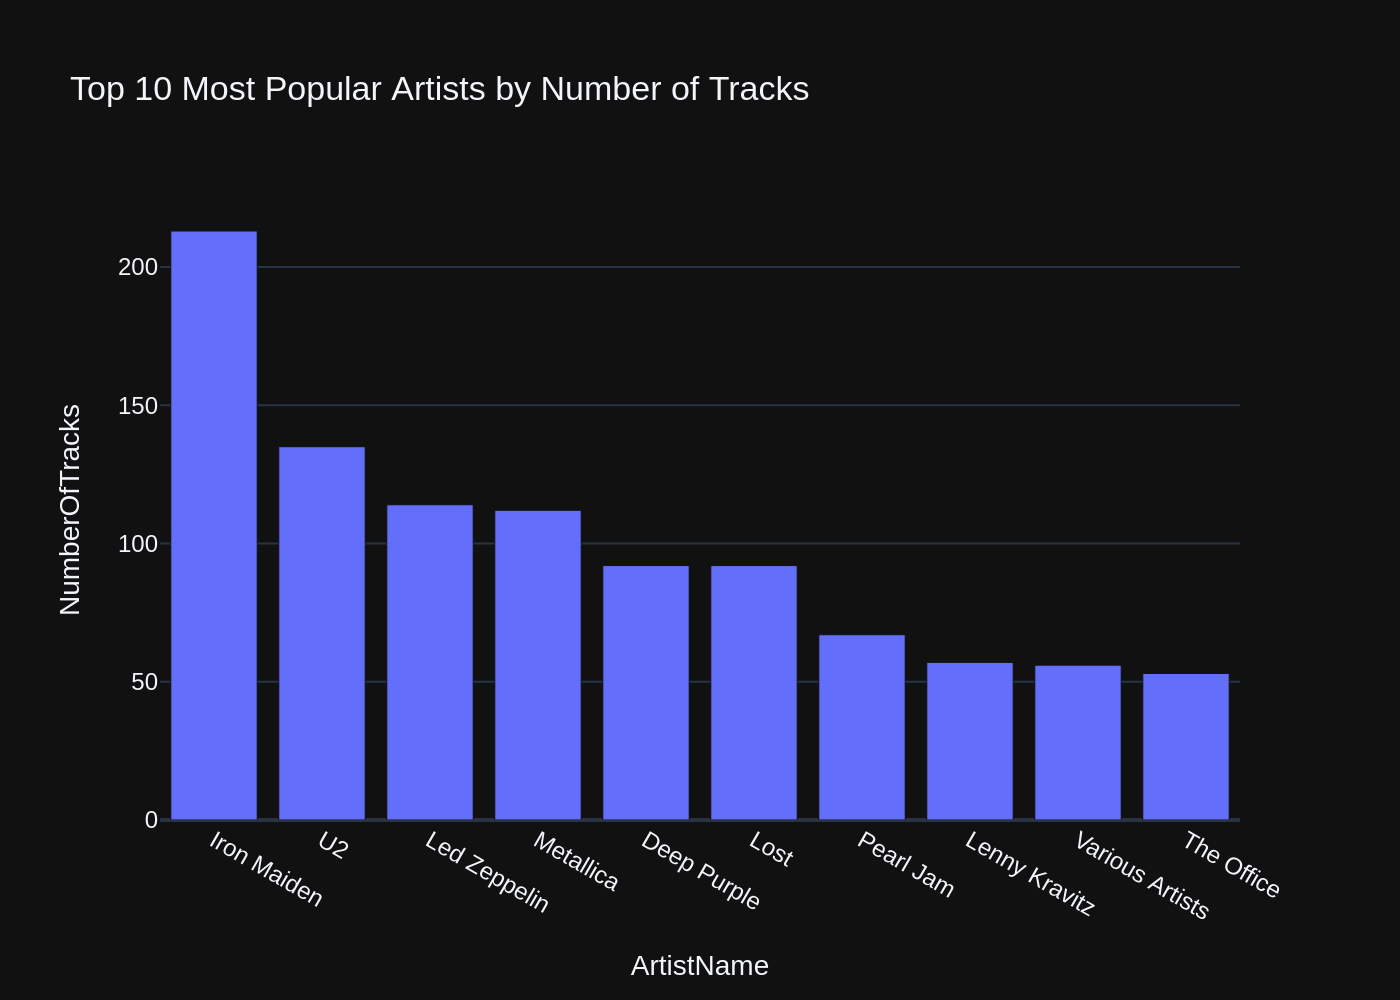

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 19:  List all customers from Canada and their email addresses:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\

SELECT CustomerId, FirstName, LastName, Email 
FROM customers 
WHERE Country = 'Canada'


[( DATA )]
queried data frame


CustomerId FirstName  LastName                   Email
0           3  François  Tremblay     ftremblay@gmail.com
1          14      Mark   Philips      mphilips12@shaw.ca
2          15  Jennifer  Peterson     jenniferp@rogers.ca
3          29    Robert     Brown        robbrown@shaw.ca
4          30    Edward   Francis     edfrancis@yachoo.ca
5          31    Martha      Silk    marthasilk@gmail.com
6          32     Aaron  Mitchell  aaronmitchell@yahoo.ca
7          33     Ellie  Sullivan  ellie.sullivan@shaw.ca


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all customers from Canada and their email addresses:'\n\nThe DataFrame was produced using this query: SELECT CustomerId, FirstName, LastName, Email \nFROM customers \nWHERE Country = 'Canada'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId     int64\nFirstName     object\nLastName      object\nEmail         object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'qwen2.5

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="text", value=df['FirstName'].iloc[0] + ' ' + df['LastName'].iloc[0]))
else:
    fig = go.Figure()
    for index, row in df.iterrows():
        fig.add_trace(go.Bar(x=[row['Email']], y=[1], name=f"{row['FirstName']} {row['LastName']}", orientation='h'))
    fig.update_layout(barmode='stack', yaxis=dict(showgrid=False, range=[-0.5, len(df)-0.5]))

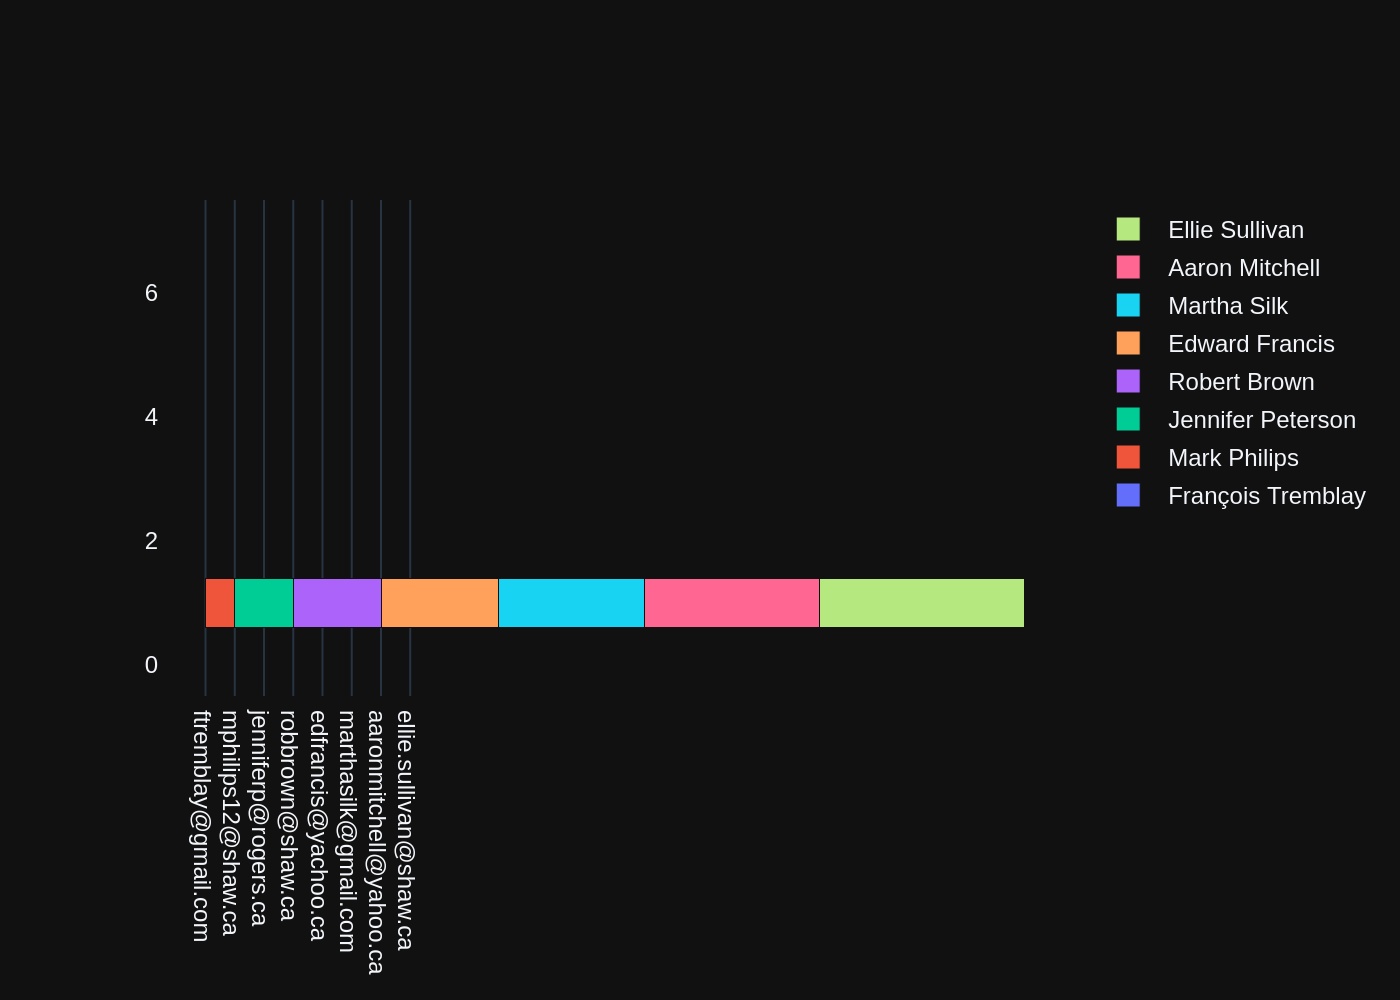

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 20:  Find the customer with the most invoices 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r

SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY InvoiceCount DESC
LIMIT 1


[( DATA )]
queried data frame


CustomerId FirstName   LastName  InvoiceCount
0           1      Luís  Gonçalves             7


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer with the most invoices '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS InvoiceCount\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\nORDER BY InvoiceCount DESC\nLIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId       int64\nFirstName       object\nLastName        object\nInvoiceCount     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indica

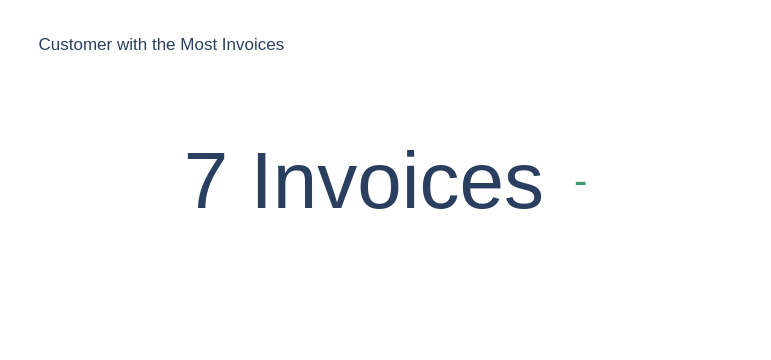


[( PYTHON )]
generated Plotly code


import plotly.graph_objs as go

if len(df) == 1:
    figure = {
        'data': [go.Indicator(
            mode='number+delta',
            value=df['InvoiceCount'].iloc[0],
            number={'suffix': " Invoices"},
            delta={'position': 'right'}
        )]
    }
else:
    figure = {
        'data': [
            go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['InvoiceCount'])
        ]
    }

figure['layout'] = go.Layout(title='Customer with the Most Invoices', xaxis=dict(title='Customer'), yaxis=dict(title='Number of Invoices'))

figure['layout'].update(margin=dict(l=50, r=50, b=100))

go.Figure(figure).show()

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 21:  Find the customer who bought the most albums in total quantity (across all invoices):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumsBought
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
JOIN tracks t ON ii.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbumsBought DESC
LIMIT 1


[( DATA )]
queried data frame


CustomerId FirstName   LastName  TotalAlbumsBought
0           1      Luís  Gonçalves                 38


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer who bought the most albums in total quantity (across all invoices):'\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumsBought\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId\nJOIN tracks t ON ii.TrackId = t.TrackId\nJOIN albums al ON t.AlbumId = al.AlbumId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\nORDER BY TotalAlbumsBought DESC\nLIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId            int64\nFirstName            object\nLastName             object\nTotalAlbumsBought     int64\ndtype: object"}, {"role": "us

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalAlbumsBought'].iloc[0]))
else:
    fig = go.Figure(go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['TotalAlbumsBought']))

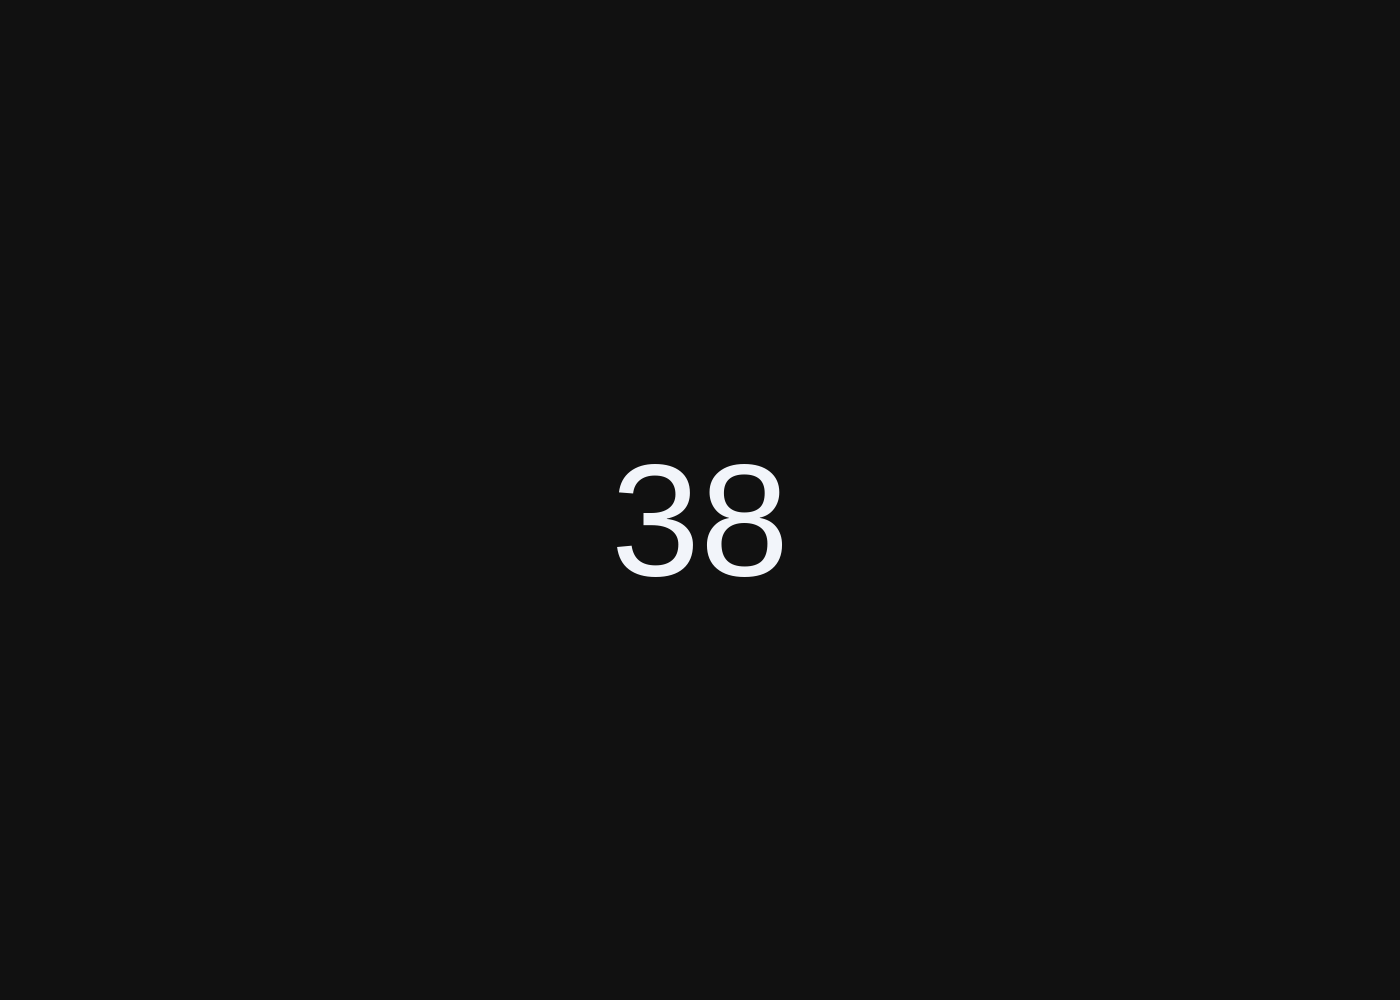

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCR

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumsBought
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
JOIN tracks t ON ii.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbumsBought DESC
LIMIT 5


[( DATA )]
queried data frame


CustomerId  FirstName     LastName  TotalAlbumsBought
0           1       Luís    Gonçalves                 38
1           2     Leonie       Köhler                 38
2           3   François     Tremblay                 38
3           4      Bjørn       Hansen                 38
4           5  František  Wichterlová                 38


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '      \n        Find the top 5 customers who bought the most albums in total quantity (across all invoices):\n        Hint: album quantity is found in invoice_items, \n    '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumsBought\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId\nJOIN tracks t ON ii.TrackId = t.TrackId\nJOIN albums al ON t.AlbumId = al.AlbumId\nGROUP BY c.CustomerId, c.FirstName, c.LastName\nORDER BY TotalAlbumsBought DESC\nLIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId            int64\nFirstName            object\n

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalAlbumsBought'].iloc[0]))
else:
    fig = go.Figure(go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['TotalAlbumsBought'],
                            marker=dict(color='rgba(58, 71, 80, 0.6)'),
                            text=df['TotalAlbumsBought'].apply(lambda x: f'{x} albums'),
                            textposition='auto'))
    fig.update_layout(title='Top 5 Customers by Total Albums Bought',
                      xaxis_title='Customer Name', yaxis_title='Total Albums Bought')

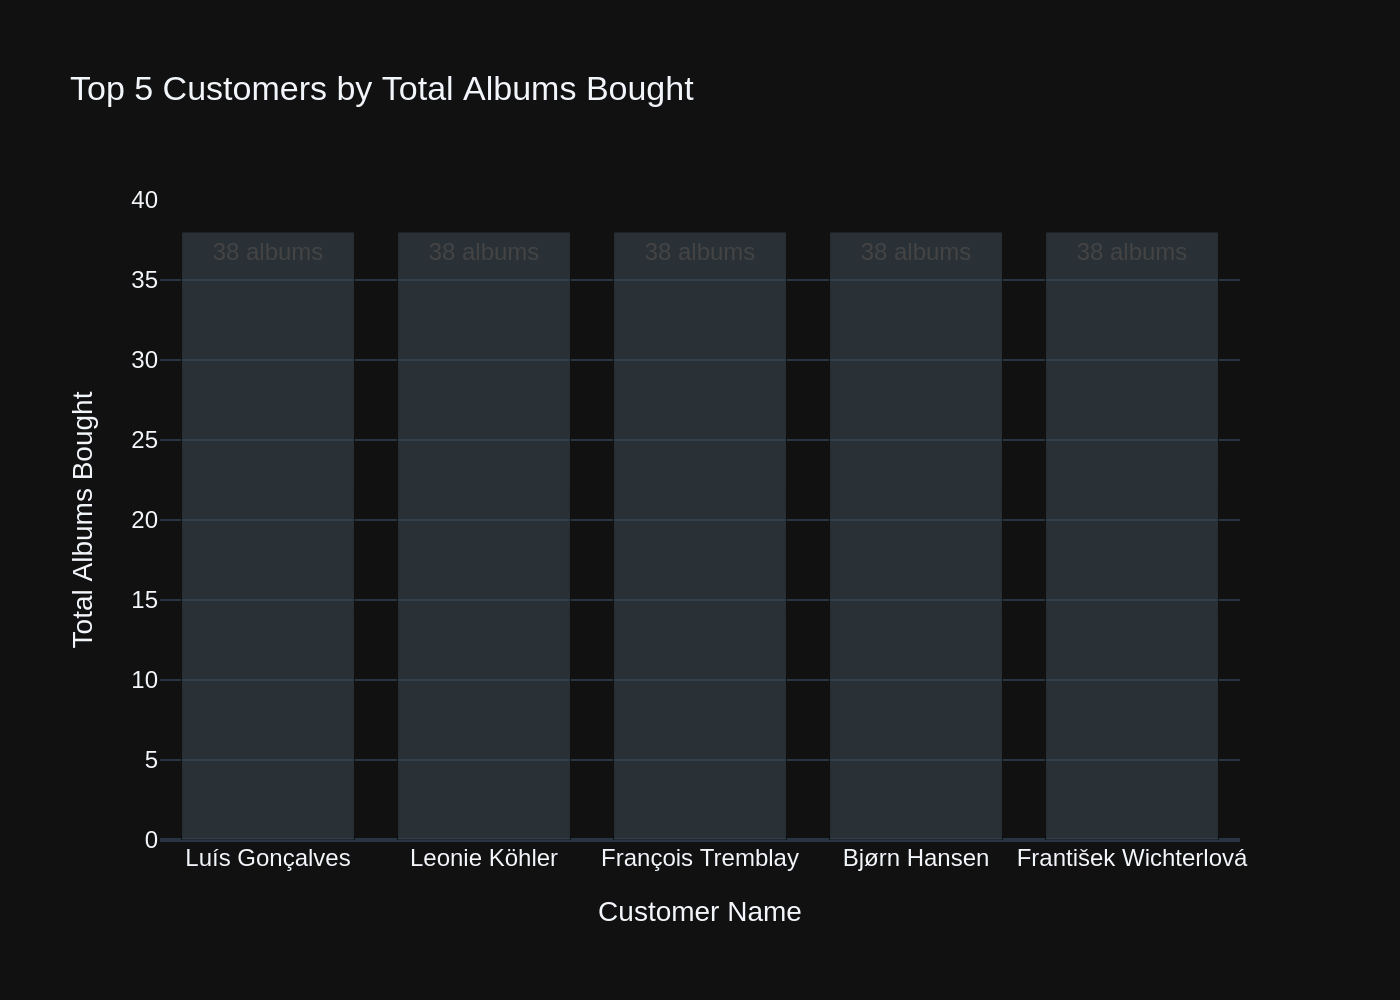

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABL

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
timed out
*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "custome

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalSpent DESC
LIMIT 5


[( DATA )]
queried data frame


CustomerId FirstName    LastName  TotalSpent
0           6    Helena        Holý       49.62
1          26   Richard  Cunningham       47.62
2          57      Luis       Rojas       46.62
3          45  Ladislav      Kovács       45.62
4          46      Hugh    O'Reilly       45.62


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question   \n         Find the top 5 customers who spent the most money overall,  \n         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary \n    , \n        the generated SQL statement None results in the following exception [ERROR-SQL] Failed to generate SQL for prompt:   \n         Find the top 5 customers who spent the most money overall,  \n         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary \n     with the following exception: \ntimed out .\n        Please fix the error and re-generate the SQL\n        '\n\nThe DataFrame was produced using this query: SELECT c.CustomerId, c.FirstName, c.LastName, SU

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalSpent'].iloc[0]))
else:
    fig = go.Figure(go.Bar(x=df['FirstName'] + ' ' + df['LastName'], y=df['TotalSpent'],
                           text=df['TotalSpent'].apply(lambda x: f'{x:.2f}'),
                           textposition='auto',
                           marker=dict(color='rgb(158,202,225)'),
                           orientation='v'))
    fig.update_layout(title='Top 5 Customers by Total Spent', xaxis_title='Customer Name', yaxis_title='Total Amount Spent')

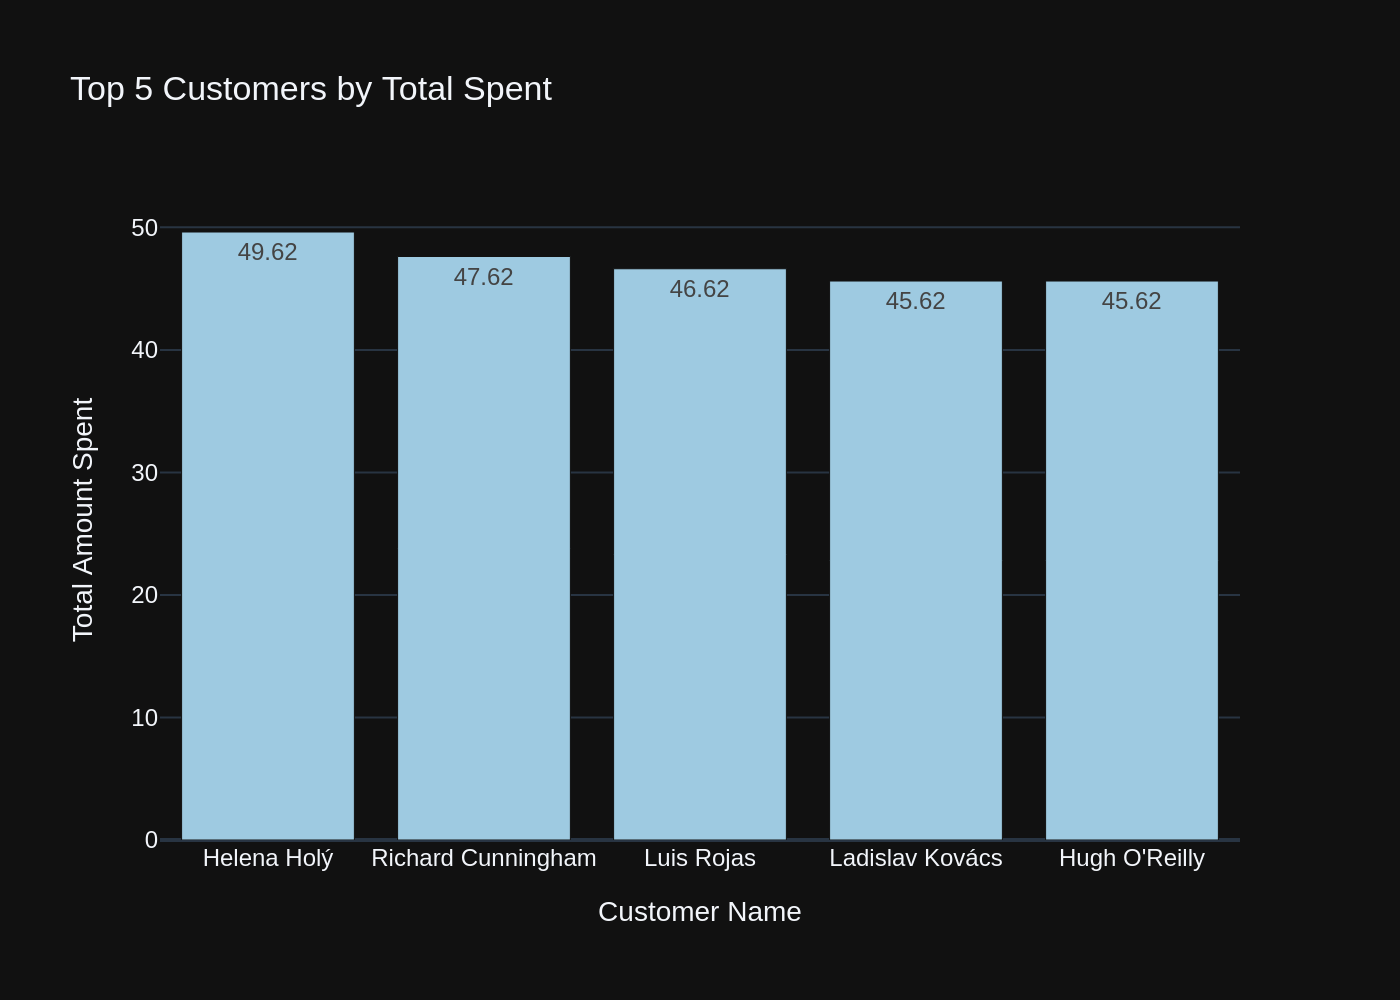

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"

SELECT p.PlaylistId, p.Name, COUNT(pt.TrackId) AS TotalTracks, SUM(t.Milliseconds) / 1000 AS TotalDurationInSeconds
FROM playlists p
JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId
JOIN tracks t ON pt.TrackId = t.TrackId
GROUP BY p.PlaylistId, p.Name
HAVING COUNT(pt.TrackId) >= 10


[( DATA )]
queried data frame


PlaylistId                        Name  TotalTracks  \
0            1                       Music         3290   
1            3                    TV Shows          213   
2            5                  90’s Music         1477   
3            8                       Music         3290   
4           10                    TV Shows          213   
5           11             Brazilian Music           39   
6           12                   Classical           75   
7           13   Classical 101 - Deep Cuts           25   
8           14  Classical 101 - Next Steps           25   
9           15  Classical 101 - The Basics           25   
10          16                      Grunge           15   
11          17         Heavy Metal Classic           26   

    TotalDurationInSeconds  
0                   877683  
1                   501094  
2                   398705  
3                   877683  
4                   501094  
5                     9486  
6                    21770  
7                     6755  
8                     7575  
9                     7439  
10                    4122  
11                    8206


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get all playlists containing at least 10 tracks and the total duration of those tracks:'\n\nThe DataFrame was produced using this query: SELECT p.PlaylistId, p.Name, COUNT(pt.TrackId) AS TotalTracks, SUM(t.Milliseconds) / 1000 AS TotalDurationInSeconds\nFROM playlists p\nJOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId\nJOIN tracks t ON pt.TrackId = t.TrackId\nGROUP BY p.PlaylistId, p.Name\nHAVING COUNT(pt.TrackId) >= 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n PlaylistId                 int64\nName                      object\nTotalTracks                int64\nTotalDurationInSeconds     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to 

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalTracks'].iloc[0], number={'suffix': " Tracks"}))
else:
    fig = go.Figure(go.Bar(x=df['Name'], y=df['TotalDurationInSeconds'], text=df['TotalTracks'], textposition='auto', texttemplate='%{text} tracks'))
fig.update_layout(title='Playlists with at least 10 tracks and their total duration in seconds')

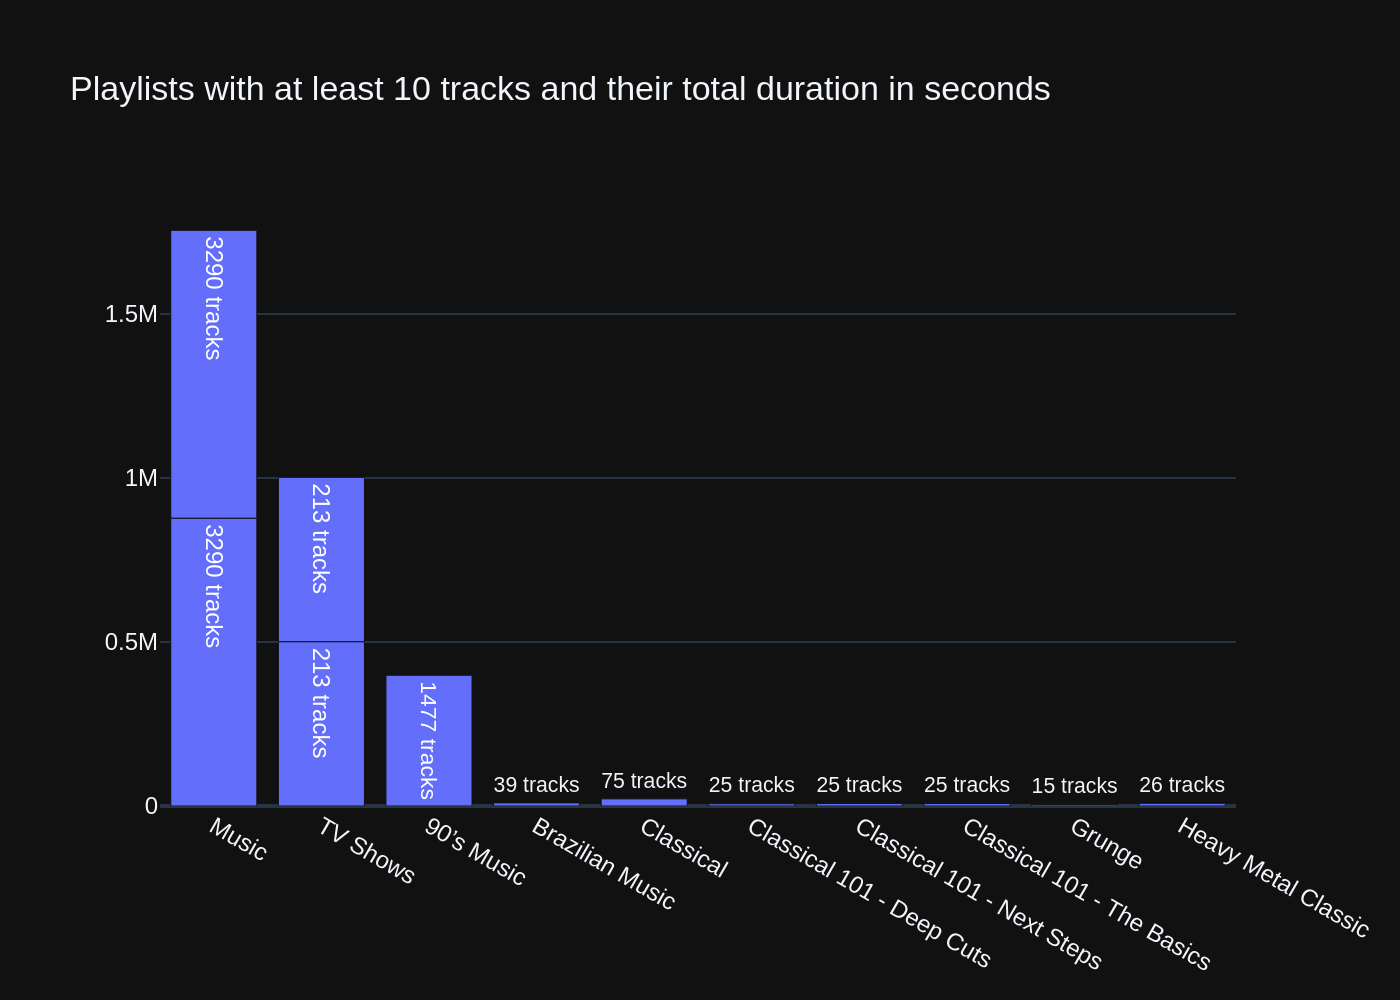

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 25:  Identify artists who have albums with tracks appearing in multiple genres:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tO

SELECT DISTINCT a.ArtistId, a.Name
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
GROUP BY a.ArtistId, al.AlbumId
HAVING COUNT(DISTINCT g.Name) > 1


[( DATA )]
queried data frame


ArtistId                  Name
0        81          Eric Clapton
1        90           Iron Maiden
2       100         Lenny Kravitz
3       147  Battlestar Galactica
4       148                Heroes
5       149                  Lost
6       156            The Office


[Ollama parameters]
model=qwen2.5:14b,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Identify artists who have albums with tracks appearing in multiple genres:'\n\nThe DataFrame was produced using this query: SELECT DISTINCT a.ArtistId, a.Name\nFROM artists a\nJOIN albums al ON a.ArtistId = al.ArtistId\nJOIN tracks t ON al.AlbumId = t.AlbumId\nJOIN genres g ON t.GenreId = g.GenreId\nGROUP BY a.ArtistId, al.AlbumId\nHAVING COUNT(DISTINCT g.Name) > 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n ArtistId     int64\nName        object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respon

import plotly.graph_objs as go

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode='number', value=df['ArtistId'].iloc[0]))
else:
    fig = go.Figure(data=[go.Bar(x=df['Name'], y=df['ArtistId'], marker_color='indianred')])
    
fig.update_layout(title='Artists with Albums in Multiple Genres', xaxis_title='Artist Name', yaxis_title='Artist ID')

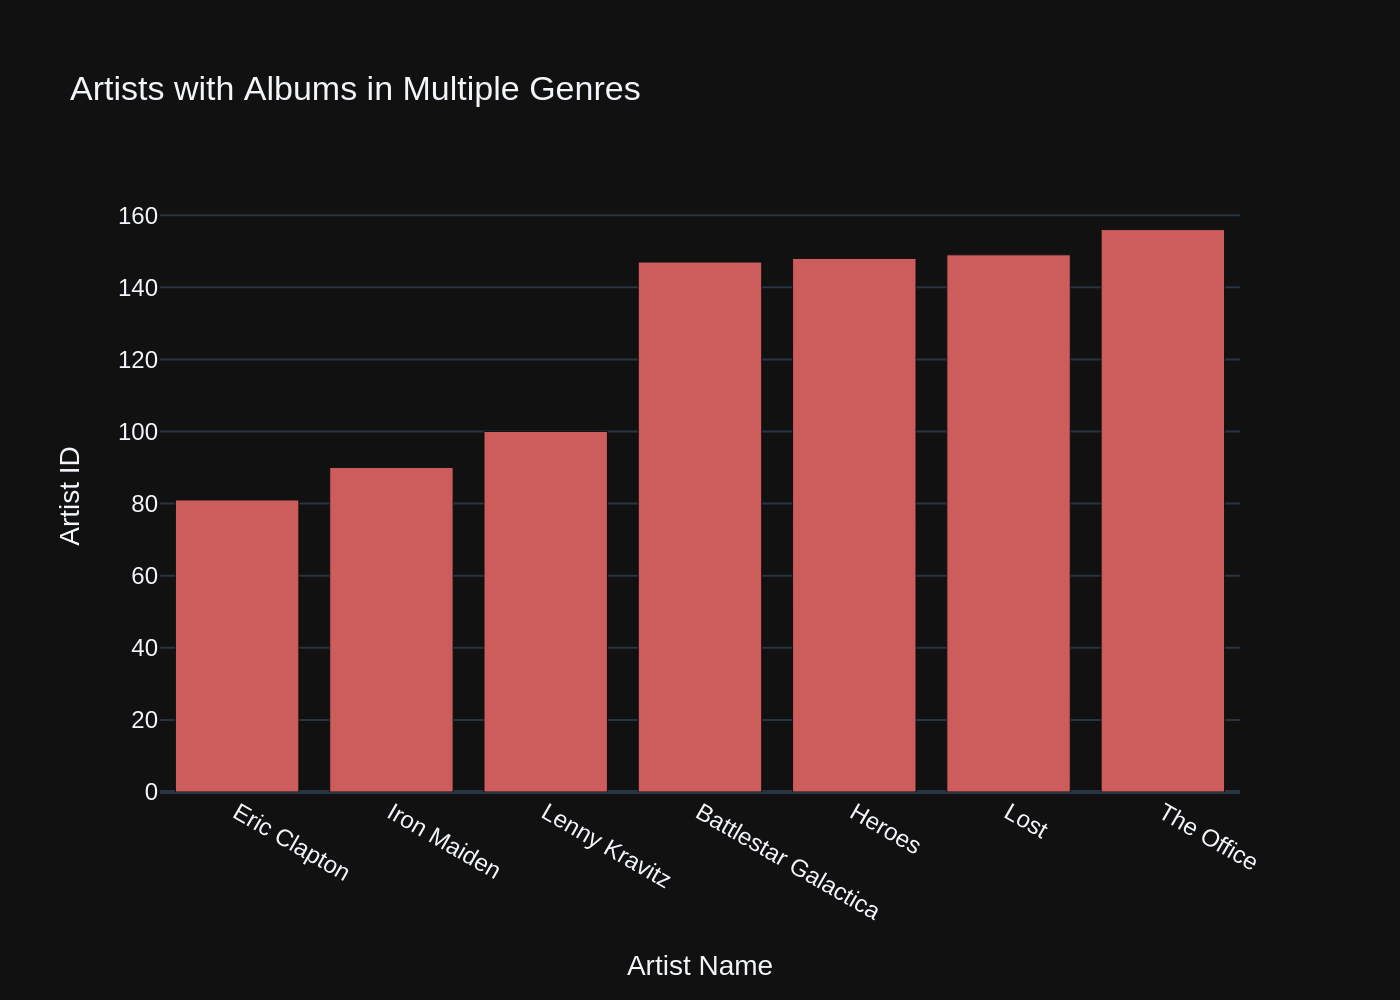

In [15]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    # if n > 5: continue
        
    my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5:14b' 
 took 5723 sec
 run on 'ducklover1' 
 at 20241012-205913


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv = file_csv.replace(":", "_")
file_csv

'training_data-qwen2.5:14b-5723s-ducklover1-20241012-205913.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

id  \
0   0635a8fa-d5d1-568f-a68d-76578fe09510-sql   
1   12139b77-b8dd-5525-9c79-d68986c652af-sql   
2   2d5184ce-e34e-5610-ab68-e6209ea6c763-sql   
3   53218464-9901-50ba-b4df-d1c11a6de761-sql   
4   55b1a26d-72ce-5fe7-8f7d-4708f7c7dddc-sql   
5   70a70d33-31e3-56b2-9303-6e6506a456d8-sql   
6   73178a89-0392-52fe-ae53-a3ae4a0e76dd-sql   
7   77f42233-4efd-5644-bcb5-5cfb8d404ff6-sql   
8   78bf2283-e012-50e9-a724-32b0fb2b790d-sql   
9   7bcc7062-b9ff-57eb-b9ce-0495e481eb65-sql   
10  9d6f7703-8508-56f1-8297-0143426d8cfb-sql   
11  a0006c30-889f-5782-8f59-726368872290-sql   
12  b7673a50-7312-5530-9290-b6199019c110-sql   
13  c113adaa-9f4b-5db7-8325-8d36336235ed-sql   
14  c177681b-286a-5322-b85b-755cbc7ee311-sql   
15  c849263c-3472-5297-87f6-2068bf9e9b3d-sql   
16  caecb17c-1d86-5b59-a340-4d5da01d1173-sql   
17  cd236df8-7822-5043-8b1f-e0d4637f2626-sql   
18  d3b34768-d9e5-5ded-ac54-b5e0ba51d287-sql   
19  d633c37d-d58a-5cdc-8d5a-8c2b2b817b36-sql   
20  ef820d84-8025-5484-ab1a-79889d948502-sql   
21  f9802296-569a-5f58-83a8-b44772a2f53e-sql   
0   039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl   
1   0db84e3d-ef41-563c-803e-21c1b985dc19-ddl   
2   10cba811-ddba-5042-9e90-d764dfcd1629-ddl   
3   2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl   
4   37319c81-65f7-50ee-956b-795de244bee5-ddl   
5   40bd77cd-e1de-5872-8693-624117ff413c-ddl   
6   41130543-7164-562a-90a7-0fd0a409c154-ddl   
7   458debc8-8082-5450-a17a-66028bd55ace-ddl   
8   4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl   
9   48d484e9-984c-58ff-b391-75521c69d486-ddl   
10  551e1120-a6ee-554f-8b8a-ccf4f22d3636-ddl   
11  5ff4911e-45c1-5a59-9566-243a9b6a3320-ddl   
12  65df0648-bf05-5f75-9365-c21f54b2302d-ddl   
13  6b585176-e66d-5b23-8d86-ca8a80e3af3d-ddl   
14  868758b8-e018-55e7-8cc3-75c0e6d211c8-ddl   
15  9ea4613d-c1be-5a77-ada9-c54ee3f0cab7-ddl   
16  a9c9a852-608d-5ef2-aede-26ba098d83d1-ddl   
17  b42cc9e1-9219-5a42-9a06-de906f76239e-ddl   
18  c387b9d2-5ff4-5a07-8364-f5dab45bb2a9-ddl   
19  d654f328-dc36-549e-84c3-06ee0db7e0f7-ddl   
20  d93f0d68-023d-5afb-8121-ba346699d318-ddl   
21  e5879308-329e-543f-a693-0c14e2f9972e-ddl   
22  ea84418b-1a28-59b4-a1f4-2fb674208adc-ddl   
0   2b4dda0a-a6ac-5e34-8f76-e41c0734d55e-doc   
1   ece10d36-9223-5045-9ac8-4b5bc090acb5-doc   

                                             question  \
0   List all customers from Canada and their email...   
1   \n        For the question   \n         Find t...   
2   List all employees and their reporting manager...   
3   Get all playlists containing at least 10 track...   
4   Find the top 5 most expensive tracks (based on...   
5   Find all invoices since 2010 and the total amo...   
6   \n        For the question what are the top 5 ...   
7   List all genres and the number of tracks in ea...   
8   Find all tracks with a name containing "What" ...   
9    Get the average invoice total for each customer:   
10  List all albums and their corresponding artist...   
11                       How many customers are there   
12        \n        Find the top 5 customers who b...   
13       List all invoices with a total exceeding $10   
14  Get the total number of invoices for each cust...   
15  Can you list all tables in the SQLite database...   
16      Find the total number of invoices per country   
17  Find the customer who bought the most albums i...   
18          Find the customer with the most invoices    
19   \n        Can you find the top 10 most popula...   
20  \n        For the question which table stores ...   
21  Identify artists who have albums with tracks a...   
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                                None   
5                                                None   
6                                                None   
7                          

In [19]:
df_training_data.to_csv(file_csv, index=False)